# Forecasting Pool Liquidity of Different Tokens and Token Pairs for Grant Selection


## Abstract

This solution emphasizes the importance of forecasting pool liquidity over token price to guide developers in selecting the most suitable tokens for grants. Liquidity is a critical indicator of a token's market health and its suitability for large transactions and long-term investment.

### Liquidity as a Stability Indicator

- **Market Confidence**: High liquidity signifies a robust level of market confidence in a token, indicating its widespread acceptance and trading activity. This robustness suggests that the token is well-integrated into the market, making it a reliable choice for developers.
  
- **Ease of Transaction**: Liquidity ensures that large transactions can be executed without a significant impact on the token’s price. This is crucial for developers who might need to liquidate or move large amounts of the token efficiently and without incurring major losses.

### Liquidity vs. Price Volatility

- **Less Volatile**: Unlike prices, which can fluctuate wildly due to speculative trading or external shocks, liquidity levels generally remain more stable. Liquidity is often supported by long-term holders and stable liquidity pools, reflecting the overall strength and durability of a token's market.
  
- **Buffer Against Volatility**: High liquidity levels can help cushion the impact of market volatility. A liquid market can absorb sales without a substantial drop in token price, providing a safer environment for developers to manage their assets.

### Planning and Strategy

- **Long-Term Planning**: Forecasting liquidity allows developers to plan strategically for the long term. Tokens with consistently high liquidity are likely to remain viable and tradable, supporting ongoing operations and development needs without added liquidity risk.
  
- **Risk Management**: By focusing on liquidity forecasting, developers can better manage risks associated with potential illiquidity. This strategic approach helps in avoiding tokens that may face liquidity shortages, which could force sellers to accept lower prices.

This solution provides a comprehensive framework for using liquidity as a predictive metric to assess the viability of tokens for grants and investments. By focusing on liquidity, developers are equipped with insights that help ensure stability, reduce risk, and support informed decision-making in the volatile cryptocurrency market.


In [1]:
import warnings
import numpy as np
import pandas as pd
from giza_datasets import DatasetsLoader
from giza_actions.action import Action, action
from giza_actions.task import task

# Load Dataset
loader = DatasetsLoader()
daily_pool_liquidity_polars = loader.load('balancer-daily-pool-liquidity')
daily_trade_volume_polars = loader.load('balancer-daily-trade-volume')

display(daily_pool_liquidity_polars.head())
display(daily_trade_volume_polars.head())

23:30:18.734 | WARNING | Compute Engine Metadata server unavailable on attempt 1 of 3. Reason: [WinError 10051] A socket operation was attempted to an unreachable network

23:30:18.753 | WARNING | Compute Engine Metadata server unavailable on attempt 2 of 3. Reason: [WinError 10051] A socket operation was attempted to an unreachable network

23:30:18.762 | WARNING | Compute Engine Metadata server unavailable on attempt 3 of 3. Reason: [WinError 10051] A socket operation was attempted to an unreachable network

23:30:18.768 | WARNING | Authentication failed using Compute Engine authentication due to unavailable metadata server.

23:30:19.869 | WARNING | Compute Engine Metadata server unavailable on attempt 1 of 5. Reason: HTTPConnectionPool(host='metadata.google.internal', port=80): Max retries exceeded with url: /computeMetadata/v1/instance/service-accounts/default/?recursive=true (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x000001D65C023610>: Failed to resolve 'metadata.google.internal' ([Errno 11001] getaddrinfo failed)"))

23:30:19.884 | WARNING | Compute Engine Metadata server unavailable on attempt 2 of 5. Reason: HTTPConnectionPool(host='metadata.google.internal', port=80): Max retries exceeded with url: /computeMetadata/v1/instance/service-accounts/default/?recursive=true (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x000001D65C0499D0>: Failed to resolve 'metadata.google.internal' ([Errno 11001] getaddrinfo failed)"))

23:30:19.896 | WARNING | Compute Engine Metadata server unavailable on attempt 3 of 5. Reason: HTTPConnectionPool(host='metadata.google.internal', port=80): Max retries exceeded with url: /computeMetadata/v1/instance/service-accounts/default/?recursive=true (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x000001D65C048B10>: Failed to resolve 'metadata.google.internal' ([Errno 11001] getaddrinfo failed)"))

23:30:19.906 | WARNING | Compute Engine Metadata server unavailable on attempt 4 of 5. Reason: HTTPConnectionPool(host='metadata.google.internal', port=80): Max retries exceeded with url: /computeMetadata/v1/instance/service-accounts/default/?recursive=true (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x000001D65C04B890>: Failed to resolve 'metadata.google.internal' ([Errno 11001] getaddrinfo failed)"))

23:30:19.917 | WARNING | Compute Engine Metadata server unavailable on attempt 5 of 5. Reason: HTTPConnectionPool(host='metadata.google.internal', port=80): Max retries exceeded with url: /computeMetadata/v1/instance/service-accounts/default/?recursive=true (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x000001D65C06C250>: Failed to resolve 'metadata.google.internal' ([Errno 11001] getaddrinfo failed)"))

day,pool_id,blockchain,pool_symbol,token_symbol,pool_liquidity,pool_liquidity_USD
date,str,str,str,str,f64,f64
2023-11-14,"""0x96518f83d66b…","""avalanche_c""","""?/btc.b 50/50""","""BTC.b""",0.000986,33.629605
2023-08-21,"""0x9fa6ab3d7898…","""avalanche_c""","""yyavax-wavax-b…","""WAVAX""",1.301717,14.693493
2023-11-01,"""0x6a06e2a5cb13…","""avalanche_c""","""emdx_lbp""","""USDC""",0.000001,0.000001
2024-01-10,"""0xa39d8651689c…","""avalanche_c""","""?/wavax 80/20""","""WAVAX""",0.317801,10.791724
2023-12-11,"""0xa154009870e9…","""avalanche_c""","""savax-bb-a-wav…","""sAVAX""",42.429779,1047.68111


day,pool_id,blockchain,token_pair,trading_volume_usd
date,str,str,str,f64
2024-01-17,"""0xeb413988a42c…","""ethereum""","""SALT-WETH""",691.881533
2024-01-01,"""0x92e7eb99a38c…","""ethereum""","""FRONT-USDC""",10564.961564
2024-01-02,"""0x69d460e01070…","""ethereum""","""USDC-WETH""",30232.770509
2024-01-03,"""0x6c323c144a8d…","""ethereum""","""WBTC-WETH""",23.69225
2024-01-06,"""0x96d99093f227…","""ethereum""","""RLY-WETH""",1680.666629


In [2]:
#Converting the polars df to pandas df
daily_pool_liquidity_df = daily_pool_liquidity_polars.to_pandas()
daily_trade_volume_df = daily_trade_volume_polars.to_pandas()

In [3]:
# Merge the datasets on 'day' and 'pool_id' using an inner join
merged_df_dirty = pd.merge(daily_pool_liquidity_df, daily_trade_volume_df, on=['day', 'pool_id', "blockchain"], how='inner')

## Cleaning the Dataset

In [4]:
# Function to generate and display a NaN report
@task(name=f"Nan Report")
def generate_nan_report(df, display_report=True, return_report=False):
    nan_counts = df.isna().sum()
    nan_percentage = (nan_counts / len(df)) * 100
    nan_report = pd.DataFrame({'Missing Values': nan_counts, 'Percentage (%)': nan_percentage})
    
    if display_report:
        pd.set_option('display.max_rows', None)
        print(nan_report)
        pd.reset_option('display.max_rows')
    
    if return_report:
        return nan_report

# Display the NaN report
nan_report = generate_nan_report.fn(merged_df_dirty, return_report=True)

# Report on value_counts for each of the columns that are of type string
value_counts_report = {}
for column in merged_df_dirty.select_dtypes(include=['object']).columns:
    value_counts_report[column] = merged_df_dirty[column].value_counts()

# Displaying the data type of each column
print(merged_df_dirty.dtypes)

# Displaying all of the value_counts_report
for key, value in value_counts_report.items():
    print(f"Value counts for {key}:\n{value}\n")

# Let's drop a non-informative variable/feature
if 'column_to_drop' in merged_df_dirty.columns:
    merged_df_dirty.drop('column_to_drop', axis=1, inplace=True)

                    Missing Values  Percentage (%)
day                              0             0.0
pool_id                          0             0.0
blockchain                       0             0.0
pool_symbol                      0             0.0
token_symbol                     0             0.0
pool_liquidity                   0             0.0
pool_liquidity_USD               0             0.0
token_pair                       0             0.0
trading_volume_usd               0             0.0
day                   datetime64[ms]
pool_id                       object
blockchain                    object
pool_symbol                   object
token_symbol                  object
pool_liquidity               float64
pool_liquidity_USD           float64
token_pair                    object
trading_volume_usd           float64
dtype: object
Value counts for pool_id:
pool_id
0x5e6989c0e2b6600ab585d56bf05479d5450a60c8    94059
0xeb58be542e77195355d90100beb07105b9bd295e    80908
0x7ef

Since there are token_symbols and token_pairs which lack sufficient data entries to train our models in te future. We will omit/remove the token symbols and token pairs where data entries are below 10,000 so that we could also make our modle more robust for the top performing tokens.

In [5]:
# Get the counts for each token_symbol and token_pair in merged_df
token_symbol_counts = merged_df_dirty['token_symbol'].value_counts()
token_pair_counts = merged_df_dirty['token_pair'].value_counts()

# Filter out the ones that have counts below 10,000
token_symbols_to_keep = token_symbol_counts[token_symbol_counts >= 10000].index
token_pairs_to_keep = token_pair_counts[token_pair_counts >= 10000].index

# Keep only the rows where token_symbol and token_pair have more than 10,000 occurrences
merged_df = merged_df_dirty[merged_df_dirty['token_symbol'].isin(token_symbols_to_keep) & merged_df_dirty['token_pair'].isin(token_pairs_to_keep)]

# Report on value_counts for each of the columns that are of type string
value_counts_report = {}
for column in merged_df.select_dtypes(include=['object']).columns:
    value_counts_report[column] = merged_df[column].value_counts()

# Displaying the data type of each column
print(merged_df.dtypes)

# Displaying all of the value_counts_report
for key, value in value_counts_report.items():
    print(f"Value counts for {key}:\n{value}\n")

day                   datetime64[ms]
pool_id                       object
blockchain                    object
pool_symbol                   object
token_symbol                  object
pool_liquidity               float64
pool_liquidity_USD           float64
token_pair                    object
trading_volume_usd           float64
dtype: object
Value counts for pool_id:
pool_id
0x5e6989c0e2b6600ab585d56bf05479d5450a60c8    39218
0x36128d5436d2d70cab39c9af9cce146c38554ff0    21387
0xeb58be542e77195355d90100beb07105b9bd295e    20389
0x32fc95287b14eaef3afa92cccc48c285ee3a280a    18966
0x415747ee98d482e6dd9b431fa76ad5553744f247    18285
                                              ...  
0x57d5a0fba0cb8df1654cb4cd7904b3546125c897        1
0x873e3fd93693d3fabe21bf9940b813dcd75483e7        1
0x70fa62cab5950172007f25d2dcfdfdcc1f720028        1
0xdbc4f138528b6b893cbcc3fd9c15d8b34d0554ae        1
0x0745a4c8a2f91b0fc297aa33c1b64b587bad4a3a        1
Name: count, Length: 990, dtype: int64

Value c

It seems the data is already clean and no NAN values are present. Now lets explore if the data contain any duplicate entries.

In [6]:
# Check how many duplicates are there in the dataset
duplicates_count = merged_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Drop duplicates and retain the first occurrence
compound_daily_interest_rates_no_dup = merged_df.drop_duplicates()
print("Duplicates dropped. First occurrence retained.")

Number of duplicate rows: 0
Duplicates dropped. First occurrence retained.


In [7]:
merged_df.shape

(482348, 9)

In [8]:
daily_pool_liquidity_df.shape

(3954420, 7)

In [9]:
daily_trade_volume_df.shape

(818937, 5)

In [10]:
merged_df.head(10)

,day,pool_id,blockchain,pool_symbol,token_symbol,pool_liquidity,pool_liquidity_USD,token_pair,trading_volume_usd
53,2023-09-22,0xa99fd9950b5d5dceeaf4939e221dca8ca9b938ab,gnosis,bal/gno/weth/wxdai 25/25/25/25,BAL,30740.082742,97610.574165,BAL-WETH,425.542193
59,2023-09-22,0xa99fd9950b5d5dceeaf4939e221dca8ca9b938ab,gnosis,bal/gno/weth/wxdai 25/25/25/25,WETH,61.062349,97610.574165,BAL-WETH,425.542193
81,2023-04-24,0xa99fd9950b5d5dceeaf4939e221dca8ca9b938ab,gnosis,bal/gno/weth/wxdai 25/25/25/25,BAL,74.299265,450.683570,BAL-WETH,2.438645
91,2023-04-24,0xa99fd9950b5d5dceeaf4939e221dca8ca9b938ab,gnosis,bal/gno/weth/wxdai 25/25/25/25,WETH,0.244678,450.683570,BAL-WETH,2.438645
117,2023-10-25,0xa99fd9950b5d5dceeaf4939e221dca8ca9b938ab,gnosis,bal/gno/weth/wxdai 25/25/25/25,BAL,30854.324075,103393.828214,BAL-WETH,843.294080
129,2023-10-25,0xa99fd9950b5d5dceeaf4939e221dca8ca9b938ab,gnosis,bal/gno/weth/wxdai 25/25/25/25,WETH,57.706377,103393.828214,BAL-WETH,843.294080
218,2023-05-24,0xa99fd9950b5d5dceeaf4939e221dca8ca9b938ab,gnosis,bal/gno/weth/wxdai 25/25/25/25,BAL,22343.070213,117993.886355,BAL-WETH,482.641557
236,2023-05-24,0xa99fd9950b5d5dceeaf4939e221dca8ca9b938ab,gnosis,bal/gno/weth/wxdai 25/25/25/25,WETH,65.204671,117993.886355,BAL-WETH,482.641557
295,2023-12-03,0x013fdedd2bd8a49d6ec9447125bf32dab2f5648e,gnosis,usdc/weth/wxdai 33/33/33,WETH,0.000495,1.071751,USDC-WETH,0.014262
296,2023-12-03,0x013fdedd2bd8a49d6ec9447125bf32dab2f5648e,gnosis,usdc/weth/wxdai 33/33/33,USDC,1.069474,1.072072,USDC-WETH,0.014262


In [11]:
#Let's take a look on how many possible groups can be created by token_symbol and token_pair variables

# Group by 'token_symbol', 'token_pair', and 'day' and aggregate the USD values
grouped_df = merged_df.groupby(['token_symbol', 'token_pair', 'day']).agg({
    'pool_liquidity_USD': 'sum',
    'trading_volume_usd': 'sum'
}).reset_index()

grouped_df.groupby(['token_symbol', 'token_pair']).ngroups

413

Since there are too many groups that will be created by grouping our merged dataframe by token_symbol and token_pair variable, we will try to focus more on the top performing tokens based on different basis.

## Top  15 Tokens by token_symbol and token_pair

C:\Users\Predator\AppData\Local\Temp\ipykernel_25364\3909621373.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['day'] = pd.to_datetime(merged_df['day'])


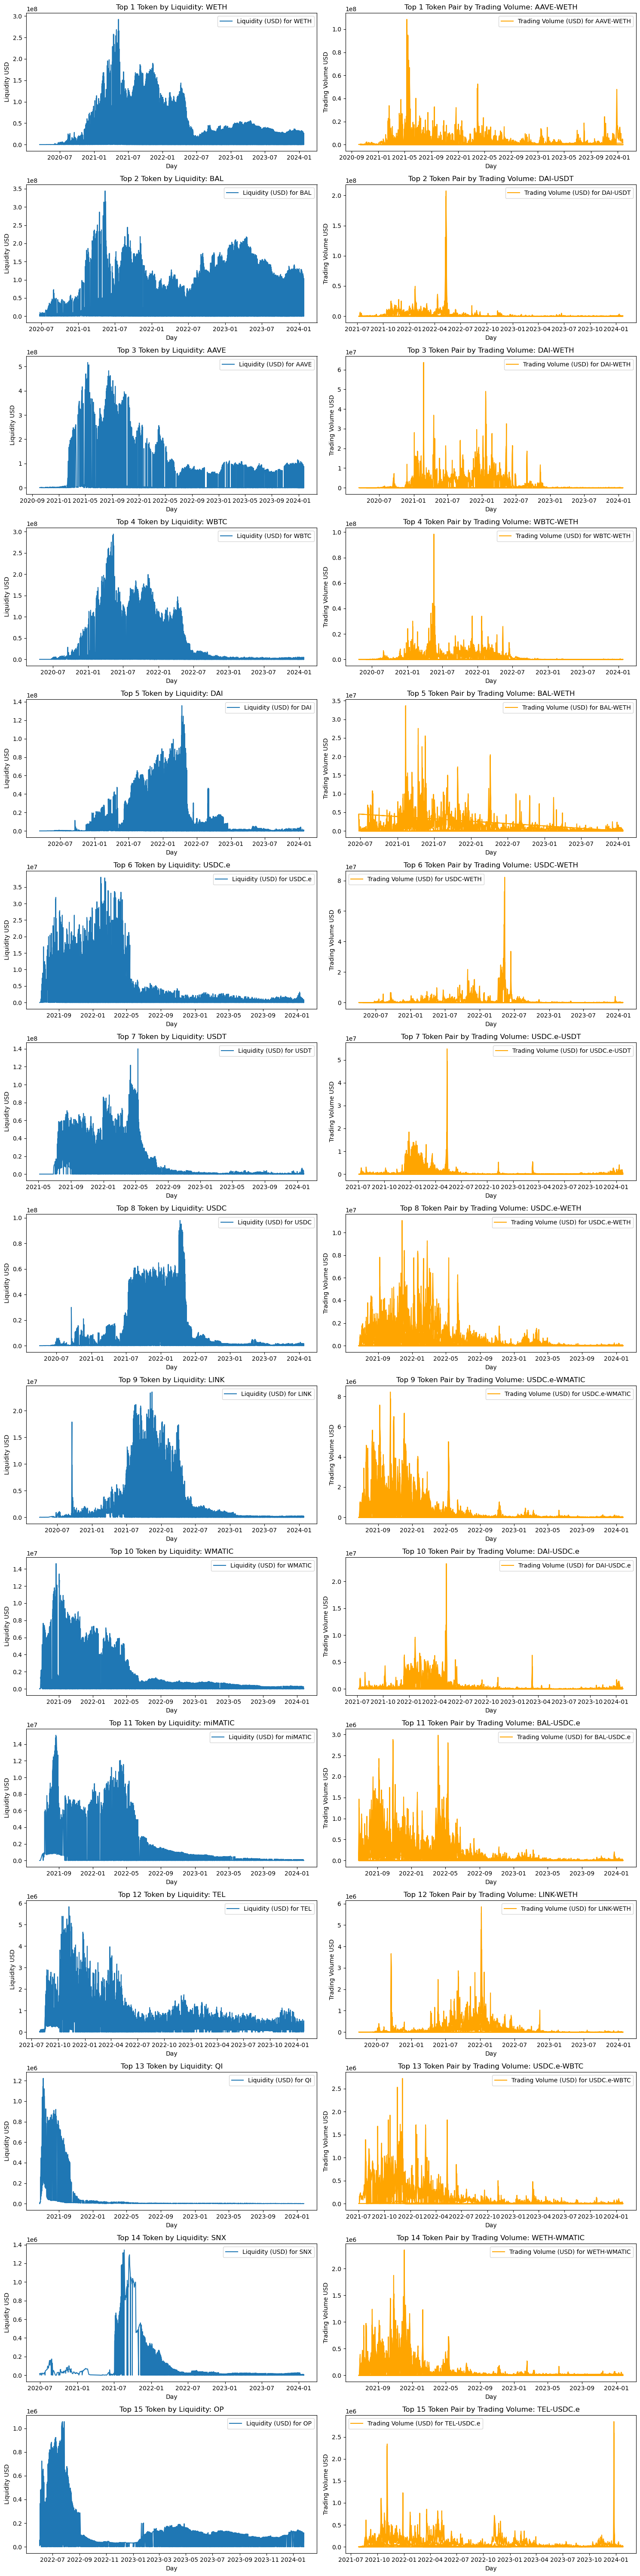

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# First, ensure 'day' is in datetime format
merged_df['day'] = pd.to_datetime(merged_df['day'])

# Group by 'token_symbol', 'token_pair', and 'day' and aggregate the USD values
grouped_df = merged_df.groupby(['token_symbol', 'token_pair', 'day']).agg({
    'pool_liquidity_USD': 'sum',
    'trading_volume_usd': 'sum'
}).reset_index()

# Find the top 15 tokens by liquidity and top 15 token pairs by trading volume
top_tokens_by_liquidity = (
    grouped_df.groupby('token_symbol')['pool_liquidity_USD'].sum().nlargest(15).index
)
top_pairs_by_volume = (
    grouped_df.groupby('token_pair')['trading_volume_usd'].sum().nlargest(15).index
)

# Initialize a figure for the subplots
fig, axes = plt.subplots(15, 2, figsize=(15, 60))  # 15 rows, 2 columns

# Plot for top 15 tokens by liquidity
for i, token in enumerate(top_tokens_by_liquidity):
    token_data = grouped_df[grouped_df['token_symbol'] == token]
    # Sort the data by 'day' before plotting
    token_data = token_data.sort_values('day')
    axes[i, 0].plot(token_data['day'], token_data['pool_liquidity_USD'], label=f'Liquidity (USD) for {token}')
    axes[i, 0].set_title(f'Top {i+1} Token by Liquidity: {token}')
    axes[i, 0].set_xlabel('Day')
    axes[i, 0].set_ylabel('Liquidity USD')
    axes[i, 0].legend()

# Plot for top 15 pairs by trading volume
for i, pair in enumerate(top_pairs_by_volume):
    pair_data = grouped_df[grouped_df['token_pair'] == pair]
    # Sort the data by 'day' before plotting
    token_data = pair_data.sort_values('day')
    axes[i, 1].plot(pair_data['day'], pair_data['trading_volume_usd'], label=f'Trading Volume (USD) for {pair}', color='orange')
    axes[i, 1].set_title(f'Top {i+1} Token Pair by Trading Volume: {pair}')
    axes[i, 1].set_xlabel('Day')
    axes[i, 1].set_ylabel('Trading Volume USD')
    axes[i, 1].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

## Top 15 Token's Pool Liquidity and Trading Volume in USD selected based on Average Pool Liquidity

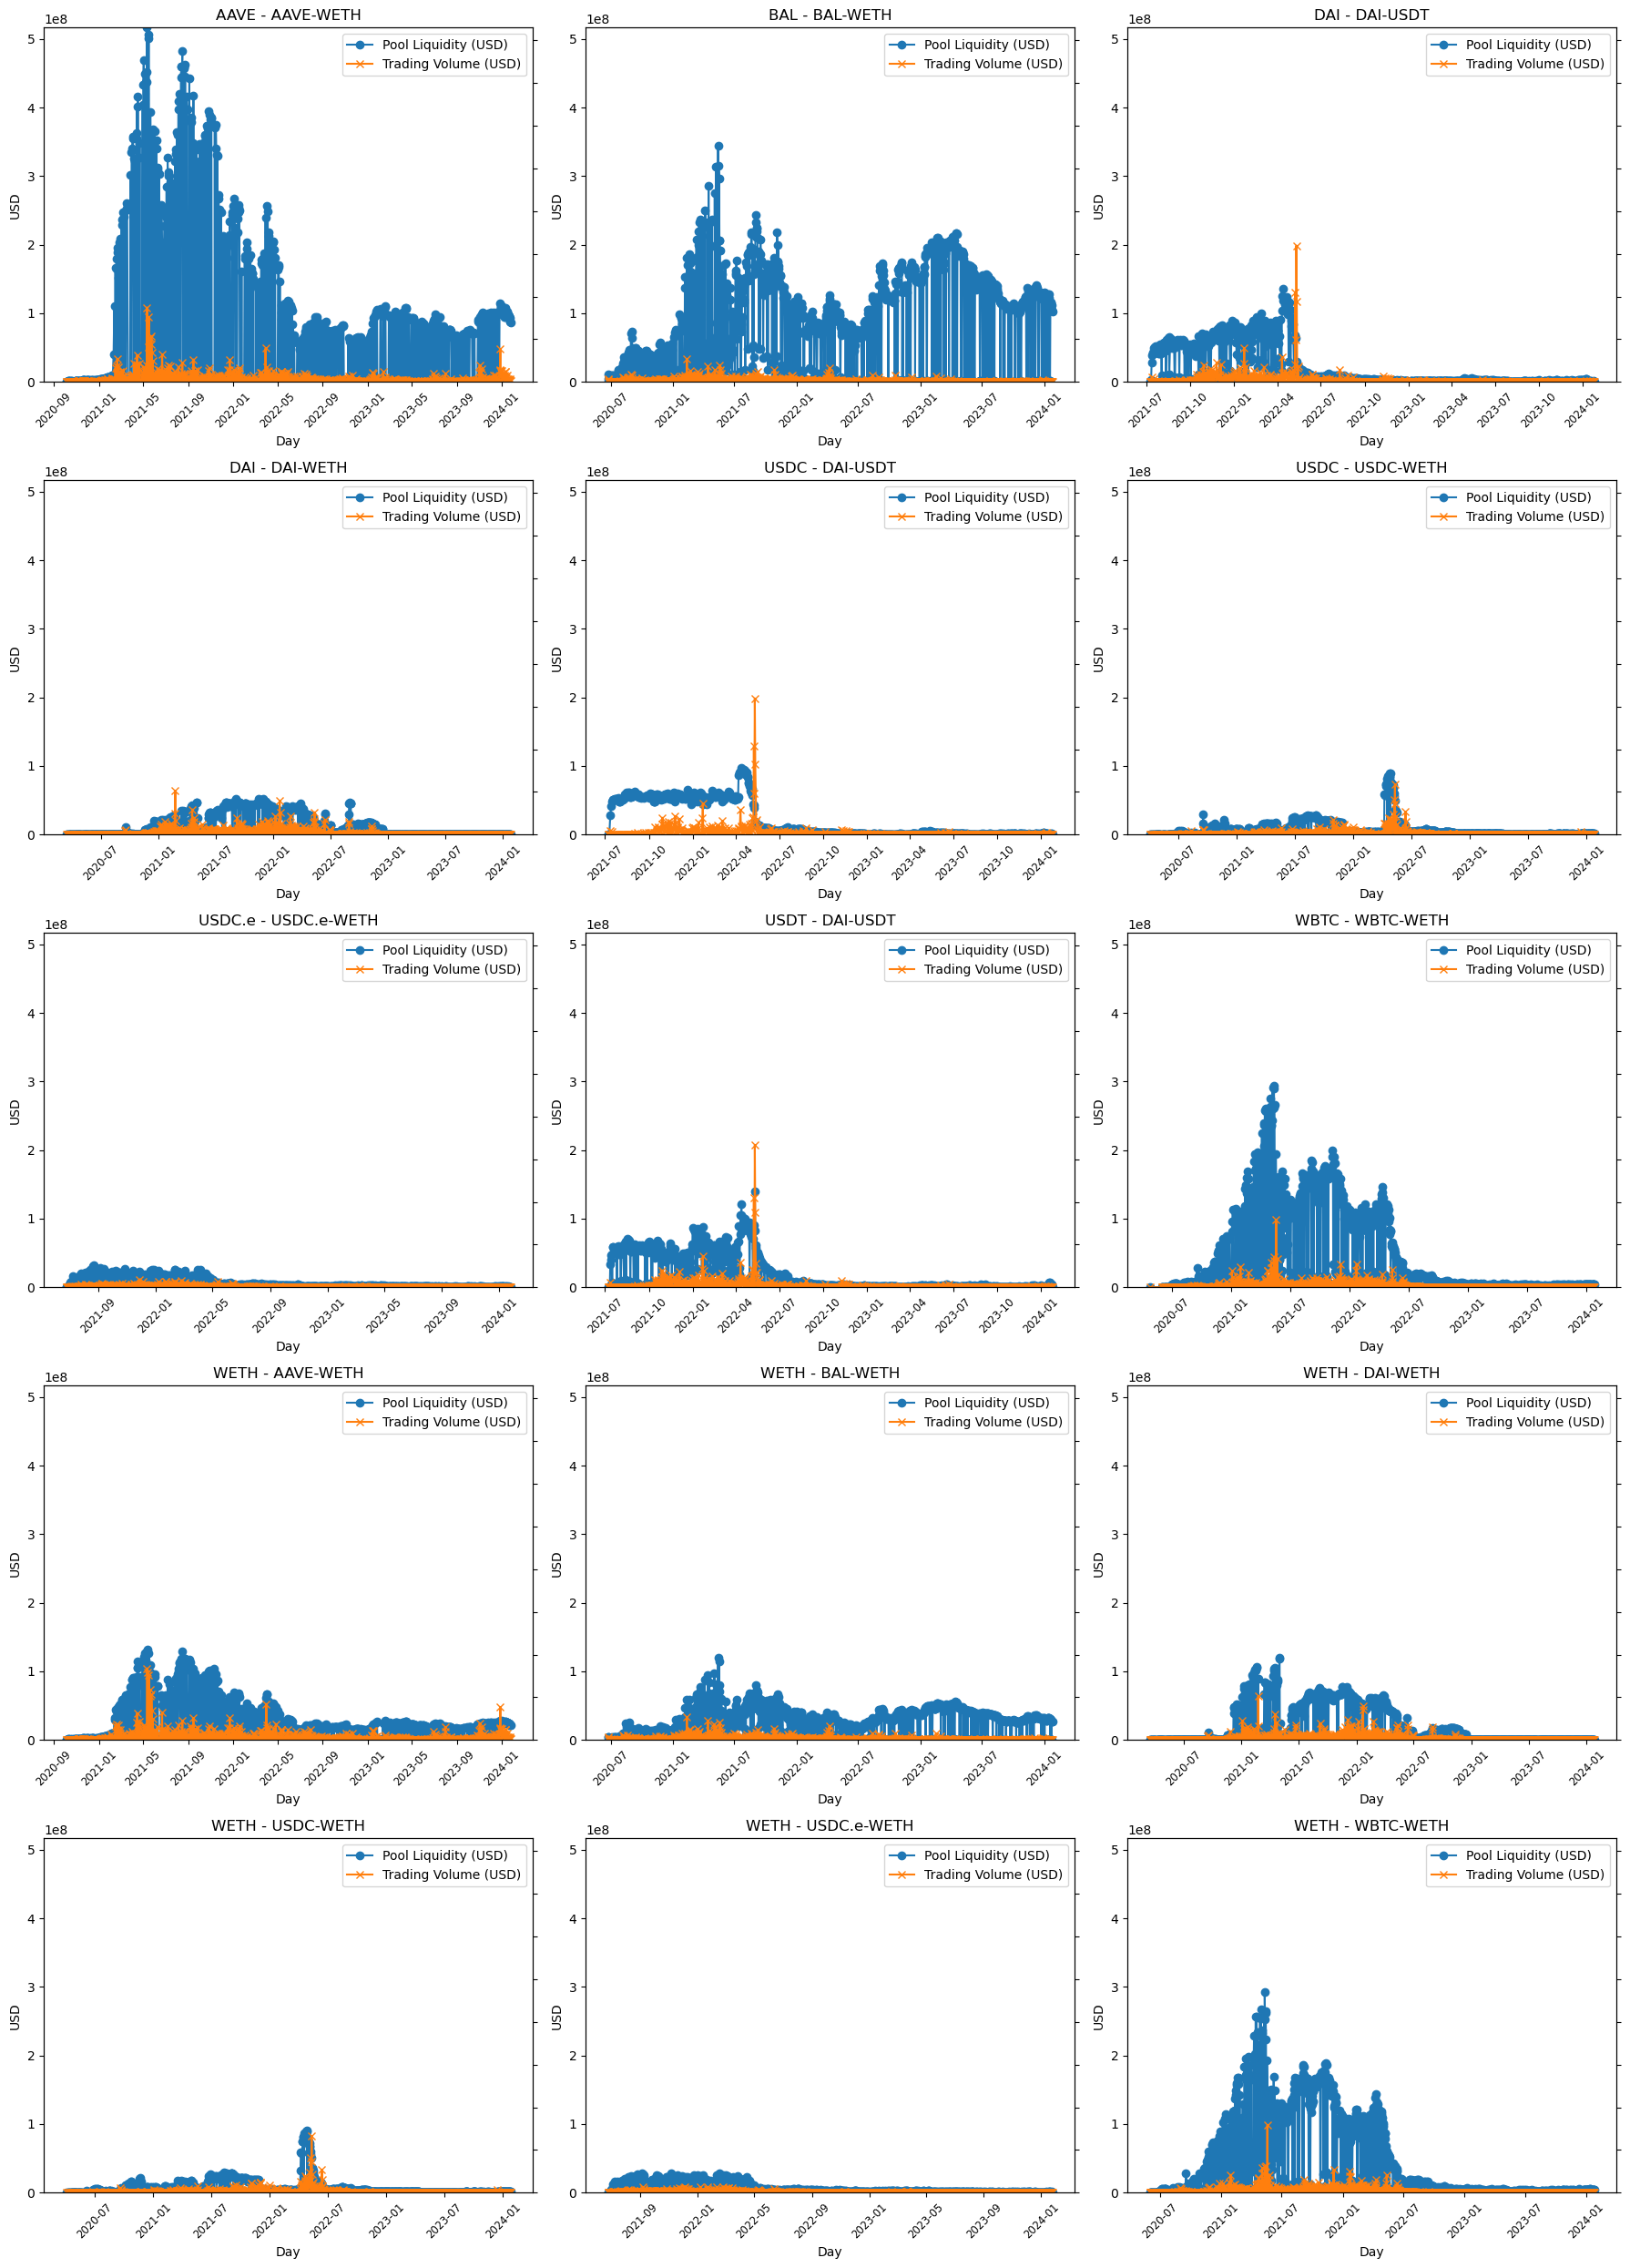

In [13]:
# Group by 'token_symbol', 'token_pair', and 'day' and aggregate the USD values
grouped_df = merged_df.groupby(['token_symbol', 'token_pair', 'day']).agg({
    'pool_liquidity_USD': 'sum',
    'trading_volume_usd': 'sum'
}).reset_index()

# Calculate the global min and max for pool liquidity and trading volume
global_liquidity_min = grouped_df['pool_liquidity_USD'].min()
global_liquidity_max = grouped_df['pool_liquidity_USD'].max()
global_volume_min = grouped_df['trading_volume_usd'].min()
global_volume_max = grouped_df['trading_volume_usd'].max()

# Determine the common scale for all subplots
common_liquidity_scale = (global_liquidity_min, global_liquidity_max)
common_volume_scale = (global_volume_min, global_volume_max)

# Calculate average liquidity for each group
avg_liquidity = grouped_df.groupby(['token_symbol', 'token_pair']).agg({
    'pool_liquidity_USD': 'mean'
}).reset_index()

# Sort by average liquidity and select the top 15 groups
top_liquidity_groups = avg_liquidity.nlargest(15, 'pool_liquidity_USD')[['token_symbol', 'token_pair']]

# Merge top groups back with the original grouped_df to get all days data
top_group_data_by_liquidity = pd.merge(top_liquidity_groups, grouped_df, on=['token_symbol', 'token_pair'])

# Initialize a figure for the subplots
fig, axes = plt.subplots(5, 3, figsize=(18, 25))  # 5 rows, 3 columns
axes = axes.flatten()  # Flatten the array to easily index it

# Plot each token_symbol and token_pair's time series data from top groups
for i, ((token_symbol, token_pair), group) in enumerate(top_group_data_by_liquidity.groupby(['token_symbol', 'token_pair'])):
    ax = axes[i]
    # Ensure the group data is sorted
    group_sorted = group.sort_values('day')
    ax.plot(group_sorted['day'], group_sorted['pool_liquidity_USD'], marker='o', label='Pool Liquidity (USD)')
    ax.plot(group_sorted['day'], group_sorted['trading_volume_usd'], marker='x', label='Trading Volume (USD)')
    
    ax.set_title(f'{token_symbol} - {token_pair}')
    ax.set_xlabel('Day')
    ax.set_ylabel('USD')
    ax.legend()

    # Set the same scale for all subplots
    ax.set_ylim(common_liquidity_scale)  # Set common liquidity scale
    ax2 = ax.twinx()  # Create a twin y-axis for the trading volume
    ax2.set_ylim(common_volume_scale)  # Set common volume scale
    ax2.set_yticklabels([])  # Hide the twin axis' y-ticks

    # Rotate x-tick labels to 45 degrees
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    # Ensure the x-tick labels don't overlap
    ax.tick_params(axis='x', which='major', labelsize='small')

# Adjust layout
plt.tight_layout()
plt.show()

## Analysis of Top 15 Token Pairs by Average Pool Liquidity

The visualizations include a comparison of the analysis of pool liquidity and trading volume of the top 15 token pairs, in terms of average pool liquidity. This analytical approach thus sheds several insights and, at the same time, begins to shed light on potential data problems affecting the interpretability of the results.

### Insights and Observations

- **Inverse Trends**: For most token pairs, an inverse relation can typically be observed between pool liquidity and trading volume. Large trading volume tends to take place when liquidity is most often shrunken, signaling that the price movements are sharper when less liquid and then attracting the trading activity. Conversely, higher liquidity tends to stabilize prices, which may reduce the incentive for trading.

- **Volatility Indicators**: Some token pairs present spikes in trading volumes that may actually work as a volatility indicator or some important event for the market. More often than not, these peaks are timeframes with huge interest from traders, sometimes skewed by outside influences such as news announcements or changes in tokenomics.

### Potential Data Issues

- **Missing Graphs**: Some visualizations lack lines altogether. This could stem from:
  - A scarcity of data points post-merging, suggesting that not all days have corresponding trade activity.
  - The presence of tokens or token pairs with limited historical data points, even before the data was merged.

- **Lack of Movement**: Several plots exhibit very low movement, which could be deceptive. One possibility is that these are referring to tokens which have sparser data over various time frames. After merging, it can happen that the granularity of data gets lost, which results in diluted visualization and is not truly showing market dynamics.

- **Concentration of Data Points**: The data points are much clustered within a given time frame, for example, a month or year. This kind of clustering might make the other period stand out as void of activity; hence, there is the need for an all-round consistent complete temporal dataset to be more effective in its analysis.

### Recommendations for Further Analysis

- Investigate the possibility of data collection issues that may have led to missing points, particularly for token pairs with sporadic or non-existent plot lines.
- Consider using a logarithmic scale for better visualization of data that spans several orders of magnitude, especially for tokens with extreme values of liquidity and volume.
- Assess the impact of external events on trading patterns to better understand the cause of spikes and troughs in trading volume and liquidity.
nce, and trader confidence.


## Top 15 Token's Pool Liquidity and Trading Volume in USD selected based on Average Trading Volume

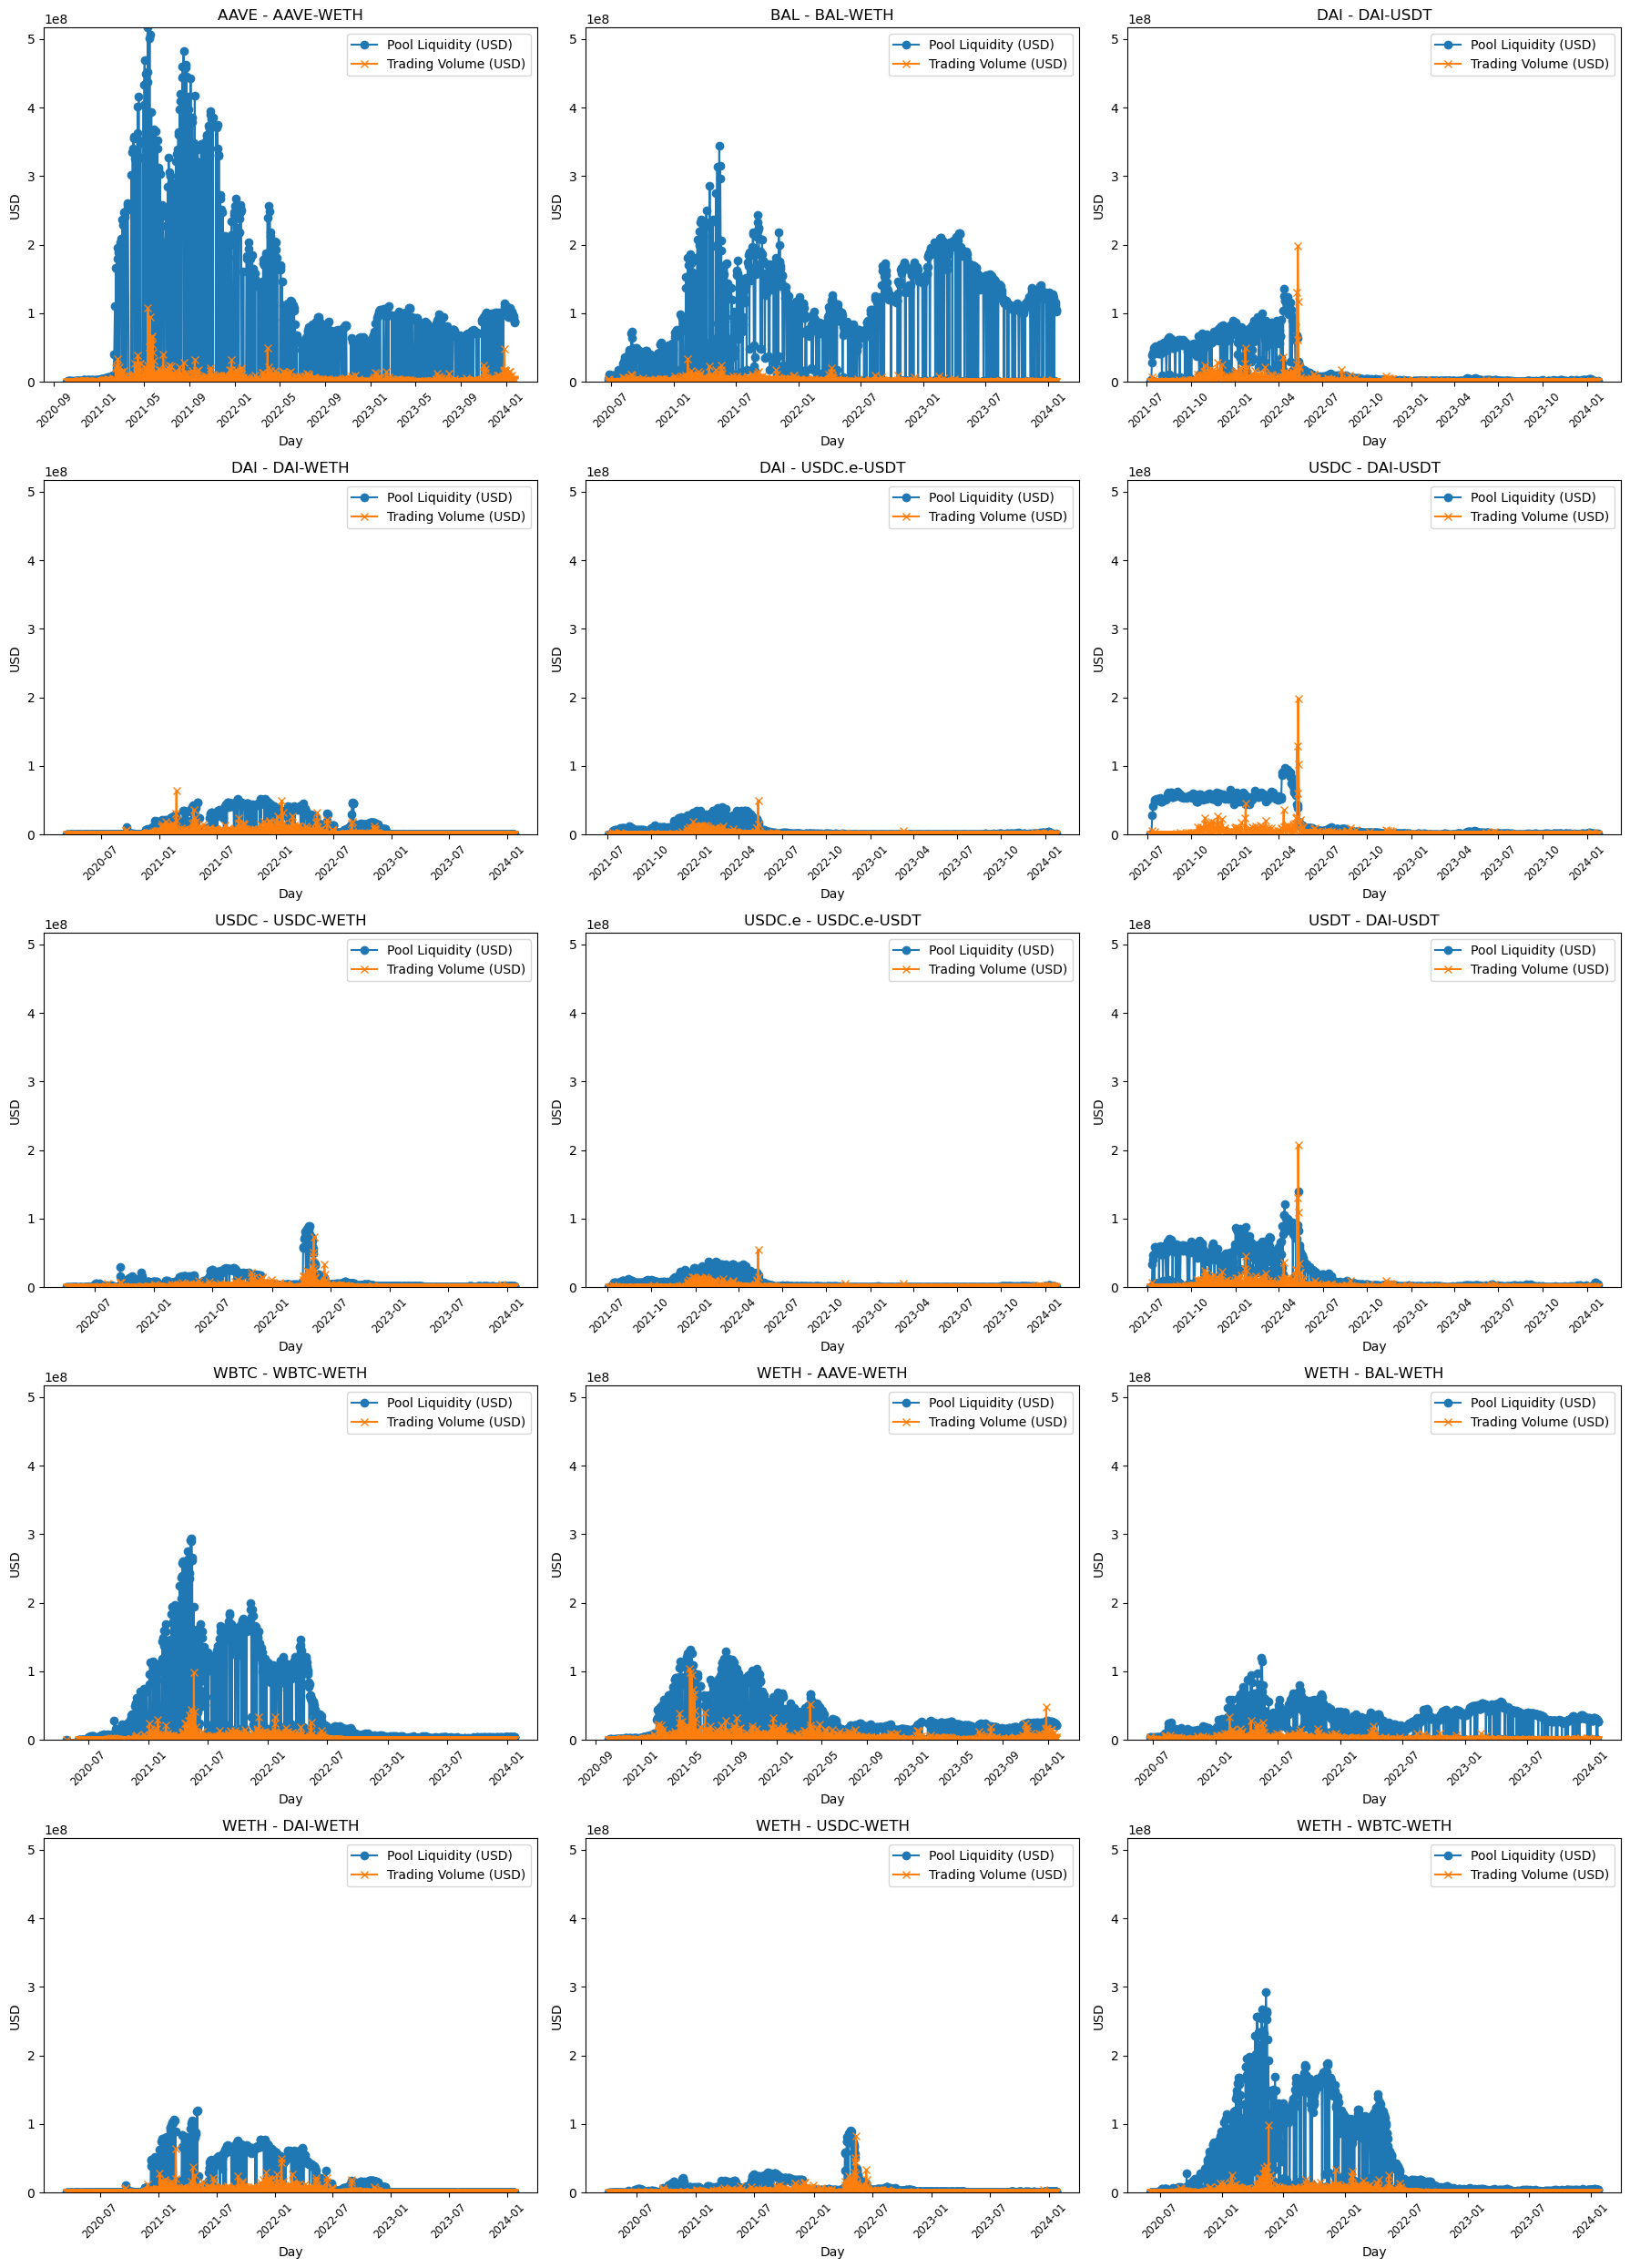

In [14]:
# Group by 'token_symbol', 'token_pair', and 'day' and aggregate the USD values
grouped_df = merged_df.groupby(['token_symbol', 'token_pair', 'day']).agg({
    'pool_liquidity_USD': 'sum',
    'trading_volume_usd': 'sum'
}).reset_index()

# Calculate average trading volume for each group
avg_trading = grouped_df.groupby(['token_symbol', 'token_pair']).agg({
    'trading_volume_usd': 'mean'
}).reset_index()

# Sort by average trading volume and select the top 15 groups
top_trading_groups = avg_trading.nlargest(15, 'trading_volume_usd')[['token_symbol', 'token_pair']]

# Merge top groups back with the original grouped_df to get all days data
top_group_data_by_trading = pd.merge(top_trading_groups, grouped_df, on=['token_symbol', 'token_pair'])

# Find global max values for liquidity and volume to set a unified y-axis scale
global_liquidity_max = top_group_data_by_trading['pool_liquidity_USD'].max()
global_volume_max = top_group_data_by_trading['trading_volume_usd'].max()
global_max = max(global_liquidity_max, global_volume_max)

# Initialize a figure for the subplots
fig, axes = plt.subplots(5, 3, figsize=(18, 25))  # 5 rows, 3 columns
axes = axes.flatten()  # Flatten the array to easily index it

# Plot each token_symbol and token_pair's time series data from top groups
for i, ((token_symbol, token_pair), group) in enumerate(top_group_data_by_trading.groupby(['token_symbol', 'token_pair'])):
    ax = axes[i]
    group_sorted = group.sort_values('day')
    ax.plot(group_sorted['day'], group_sorted['pool_liquidity_USD'], marker='o', label='Pool Liquidity (USD)')
    ax.plot(group_sorted['day'], group_sorted['trading_volume_usd'], marker='x', label='Trading Volume (USD)')
    
    ax.set_title(f'{token_symbol} - {token_pair}')
    ax.set_xlabel('Day')
    ax.set_ylabel('USD')
    ax.legend()

    # Rotate x-tick labels to 45 degrees
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    # Ensure the x-tick labels don't overlap
    ax.tick_params(axis='x', which='major', labelsize='small')
    
    # Set the same y-axis scale for all subplots
    ax.set_ylim([0, global_max])

# Adjust layout
plt.tight_layout()
plt.show()


### Insights from Token Pair Analysis

#### Diverging Trends
The pool liquidity versus trading volume depicts most plots of inverse relationships between the two. The low liquidity of many times has seen the volume of trading increase, with the possibility of large price movements attracting traders. High liquidity could also possibly carry with it the benefit of lowering price volatility, which in turn may lead to reduced trading volumes.

#### Missing Data
The absence of lines in some plots could be due to several reasons:

- **No Transactions**: This means that there may have been no trades for that particular token pair on some days, hence recording a trading volume of 0.
- **Data Issues**: There might be missing or corrupt data points due to issues in data collection or processing.g.cessing.


## Distribution and Outliers Visualization

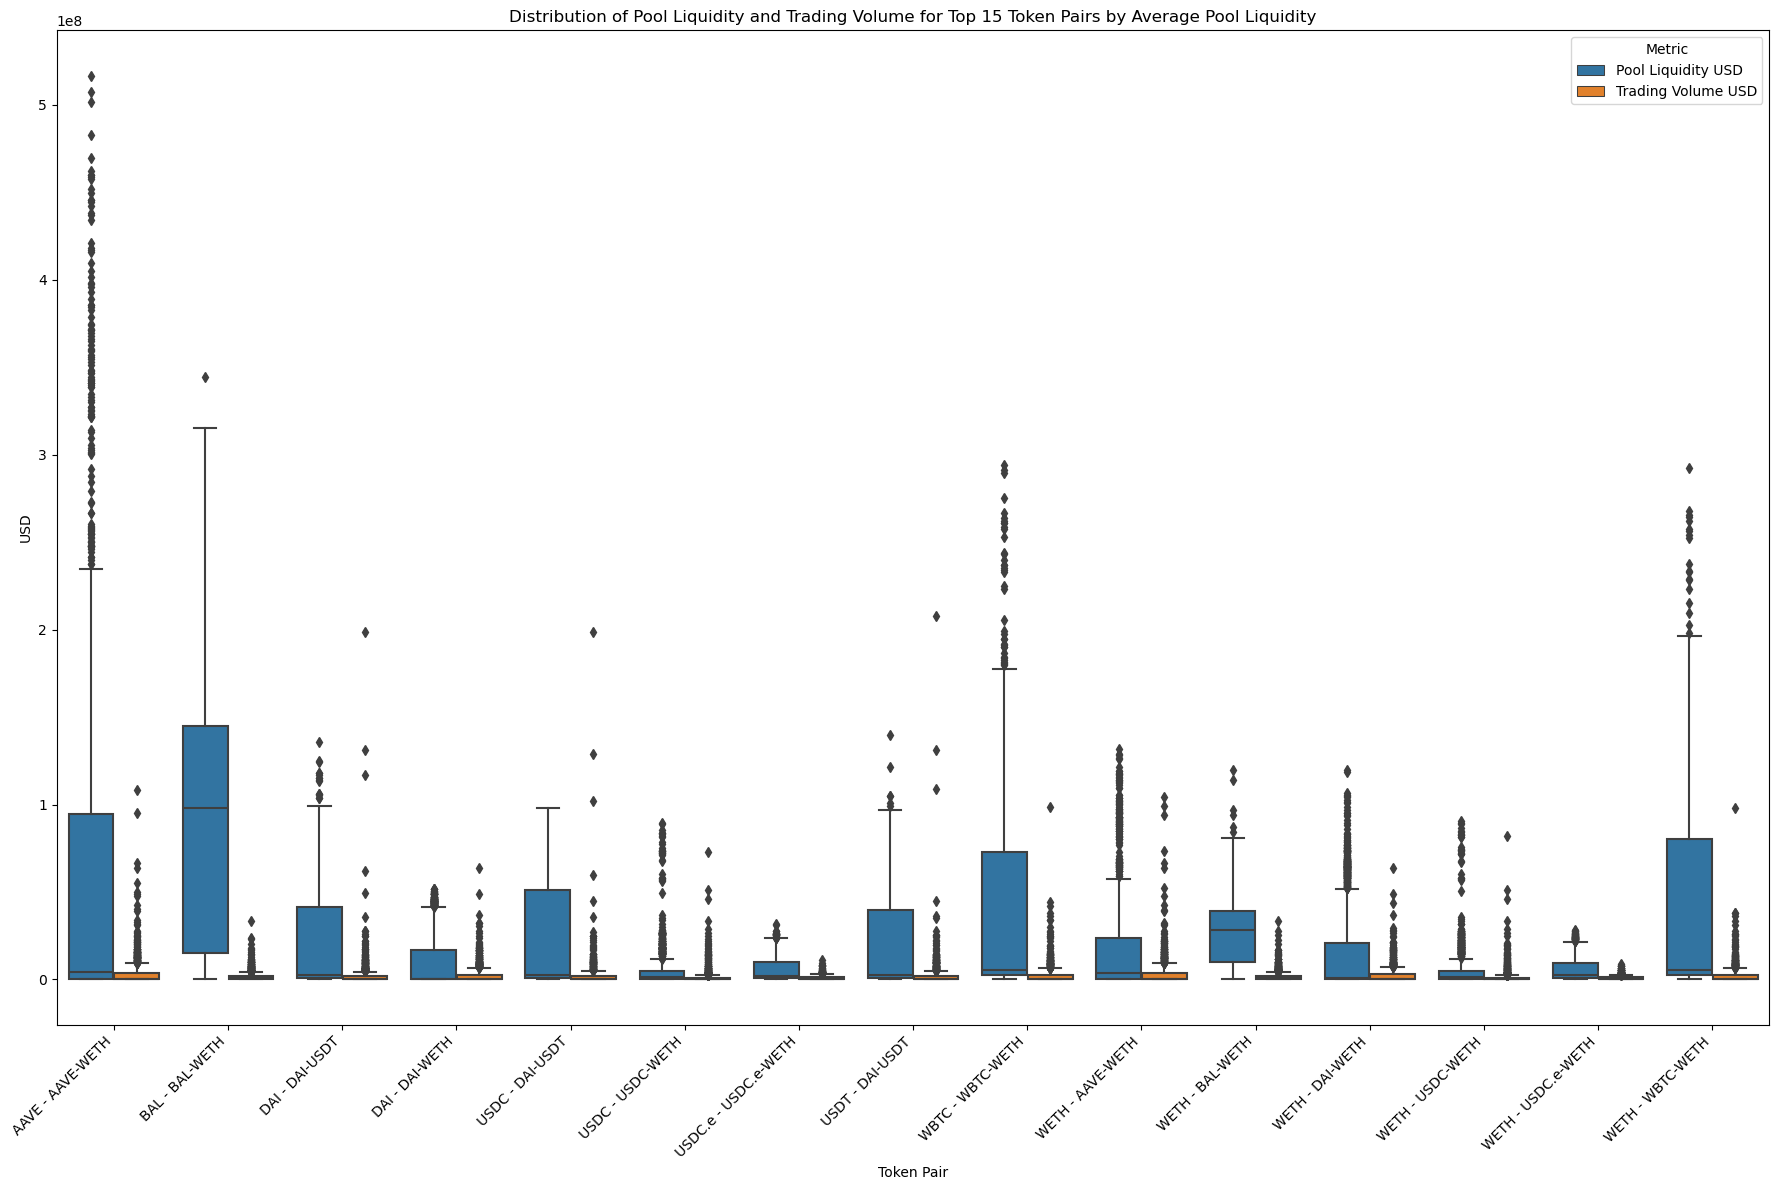

In [15]:
import seaborn as sns

# Group by 'token_symbol', 'token_pair', and 'day' and aggregate the USD values
grouped_df = merged_df.groupby(['token_symbol', 'token_pair', 'day']).agg({
    'pool_liquidity_USD': 'sum',
    'trading_volume_usd': 'sum'
}).reset_index()

# Calculate average liquidity for each group
avg_liquidity = grouped_df.groupby(['token_symbol', 'token_pair']).agg({
    'pool_liquidity_USD': 'mean'
}).reset_index()

# Sort by average liquidity and select the top 15 groups
top_liquidity_groups = avg_liquidity.nlargest(15, 'pool_liquidity_USD')[['token_symbol', 'token_pair']]

# Merge top groups back with the original grouped_df to get all days data
top_group_data_by_liquidity = pd.merge(top_liquidity_groups, grouped_df, on=['token_symbol', 'token_pair'])

# Prepare the DataFrame for box plot
liquidity_values = []
volume_values = []
labels = []

# Collect data for each token_symbol and token_pair
for (token_symbol, token_pair), group in top_group_data_by_liquidity.groupby(['token_symbol', 'token_pair']):
    liquidity_values.append(group['pool_liquidity_USD'].values)
    volume_values.append(group['trading_volume_usd'].values)
    labels.append(f'{token_symbol} - {token_pair}')

# Flatten the data and create a DataFrame suitable for seaborn's boxplot
boxplot_data = pd.DataFrame({
    'Value': liquidity_values + volume_values,
    'Metric': ['Pool Liquidity USD'] * len(liquidity_values) + ['Trading Volume USD'] * len(volume_values),
    'Token Pair': labels * 2
}).explode('Value')

# Ensure the 'Value' column is float for plotting
boxplot_data['Value'] = boxplot_data['Value'].astype(float)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18, 12))

# Create a box plot
sns.boxplot(x='Token Pair', y='Value', hue='Metric', data=boxplot_data, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Distribution of Pool Liquidity and Trading Volume for Top 15 Token Pairs by Average Pool Liquidity')
ax.set_ylabel('USD')

# Adjust layout
plt.tight_layout()
plt.show()

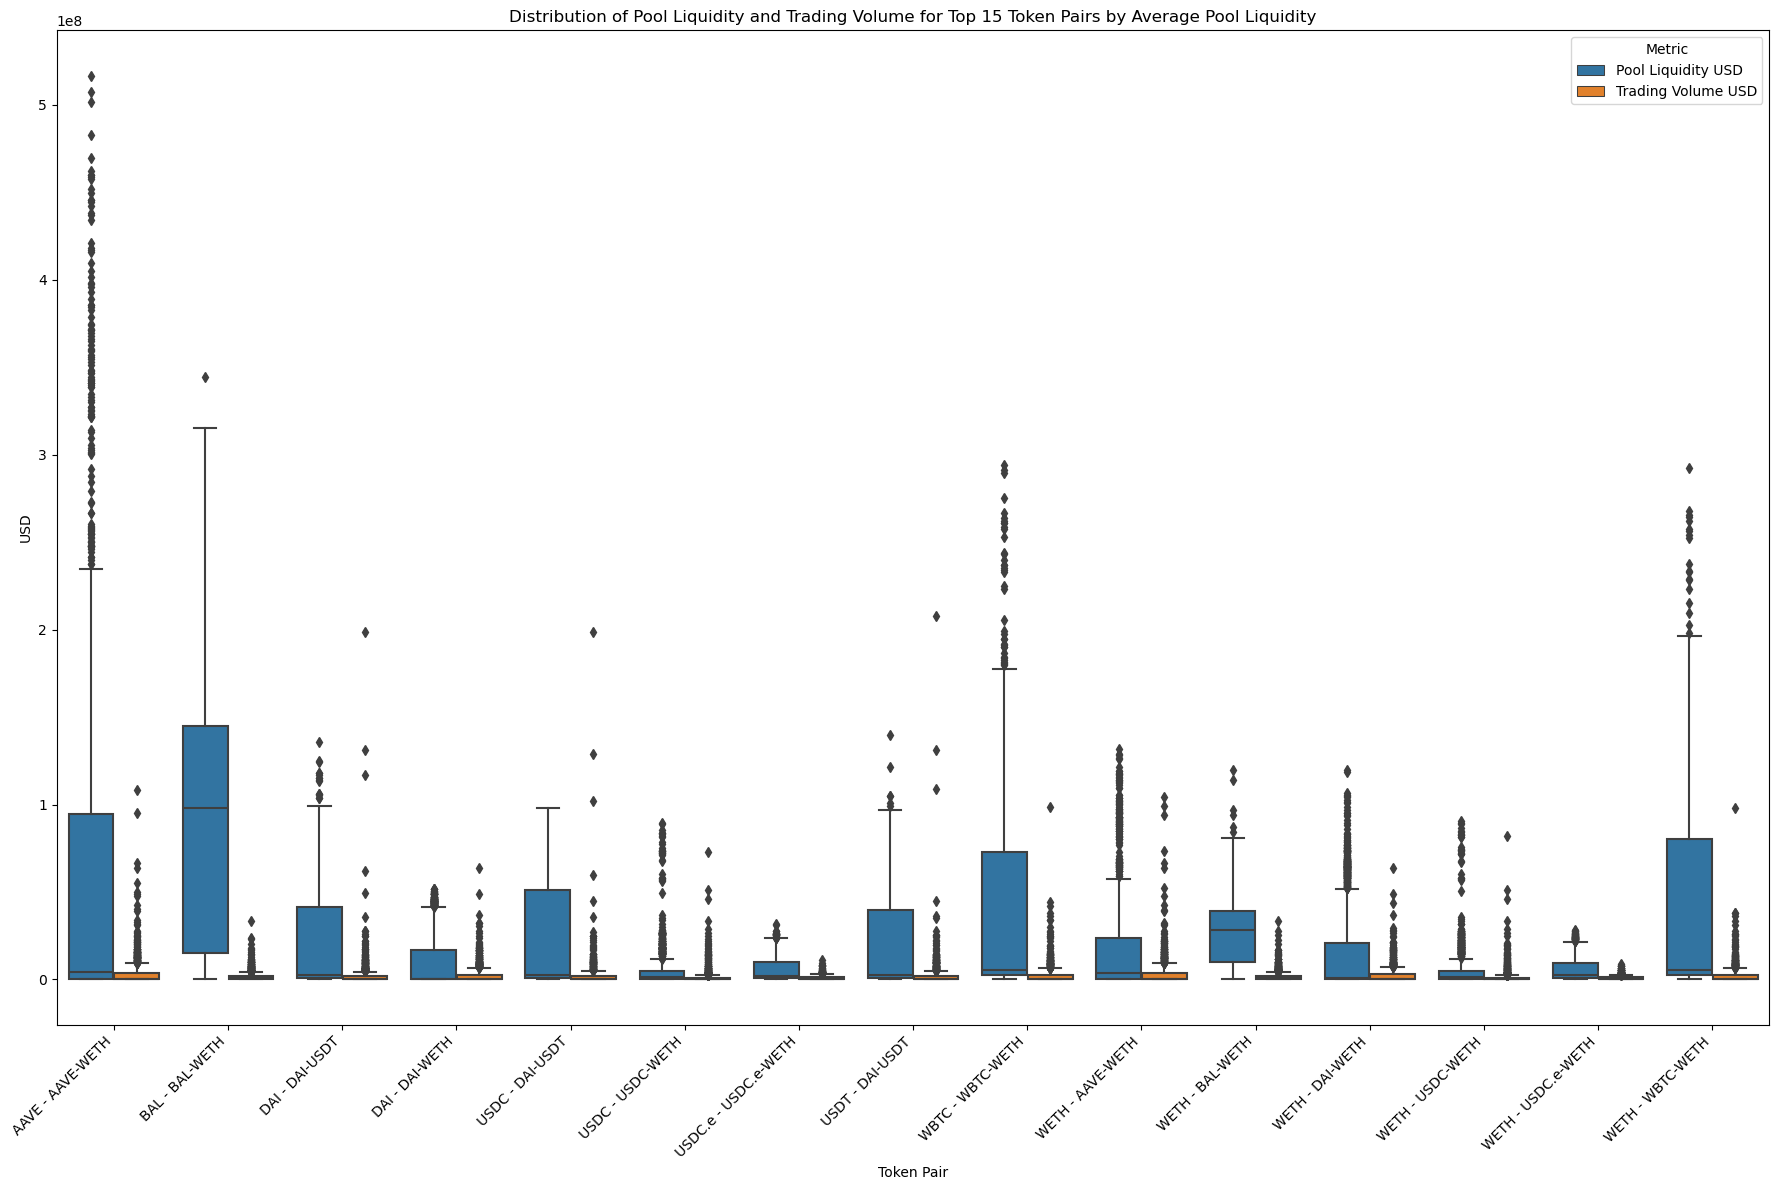

In [16]:
# Group by 'token_symbol', 'token_pair', and 'day' and aggregate the USD values
grouped_df = merged_df.groupby(['token_symbol', 'token_pair', 'day']).agg({
    'pool_liquidity_USD': 'sum',
    'trading_volume_usd': 'sum'
}).reset_index()

# Calculate average liquidity for each group
avg_trading = grouped_df.groupby(['token_symbol', 'token_pair']).agg({
    'trading_volume_usd': 'mean'
}).reset_index()

# Sort by average liquidity and select the top 15 groups
top_trading_groups = avg_trading.nlargest(15, 'trading_volume_usd')[['token_symbol', 'token_pair']]

# Merge top groups back with the original grouped_df to get all days data
top_group_data_by_trading = pd.merge(top_trading_groups, grouped_df, on=['token_symbol', 'token_pair'])

# Prepare the DataFrame for box plot
liquidity_values = []
volume_values = []
labels = []

# Collect data for each token_symbol and token_pair
for (token_symbol, token_pair), group in top_group_data_by_liquidity.groupby(['token_symbol', 'token_pair']):
    liquidity_values.append(group['pool_liquidity_USD'].tolist())
    volume_values.append(group['trading_volume_usd'].tolist())
    labels.append(f'{token_symbol} - {token_pair}')

# Flatten the data and create a DataFrame suitable for seaborn's boxplot
boxplot_data = pd.DataFrame({
    'Value': liquidity_values + volume_values,
    'Metric': ['Pool Liquidity USD'] * len(liquidity_values) + ['Trading Volume USD'] * len(volume_values),
    'Token Pair': labels * 2
}).explode('Value')

# Ensure the 'Value' column is float for plotting
boxplot_data['Value'] = boxplot_data['Value'].astype(float)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18, 12))

# Create a box plot
sns.boxplot(x='Token Pair', y='Value', hue='Metric', data=boxplot_data, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Distribution of Pool Liquidity and Trading Volume for Top 15 Token Pairs by Average Pool Liquidity')
ax.set_ylabel('USD')

# Adjust layout
plt.tight_layout()
plt.show()


### Insights from the Visualization

#### Variability in Distribution
The box plots demonstrate significant variability in both pool liquidity and trading volume among different token pairs. Some tokens exhibit a tight distribution indicating consistent market behavior, while others show wide variance, suggesting varying degrees of market activity and stability.

#### Presence of Outliers
Numerous outliers in liquidity and trading volume for many token pairs point to days with exceptional market activity. These outliers may correspond to specific market events, such as news announcements or sudden market interest, leading to temporary spikes or drops in trading behavior.

#### Comparison of Metrics
The side-by-side comparison of pool liquidity and trading volume reveals that some token pairs have higher liquidity with lower volume, and others the opposite. This contrast could be indicative of different trading strategies or varying market conditions across token pairs.


## Handling Outliers and Data Scaling

In preparing our dataset for deep learning, special consideration is given to the treatment of outliers and the scaling of data:

### Log Transformation
- **Optimal for Market Extremes**: Captures authentic market scenarios, like spikes from impactful events, without letting them dominate the dataset.
- **Mitigates Skewness**: Reduces the influence of the long tail in right-skewed financial data, such as trading volumes.
- **Aids Model Stability**: Supports deep learning architectures in managing variance and learning from normalized data distributions.

### Outlier Removal
- **Error Correction**: Discards data that is likely erroneous or that does not represent the intended market behaviors, such as anomalies from data entry errors.
- **Focuses on Typical Trends**: Ensures that the model prioritizes learning representative market patterns rather than being misled by extremes.

_The following code section implements these strategies to ensure our deep learning model can learn from the most relevant and insightful daa patterns._
redictions.

In [17]:
# Apply log transformation
merged_df['log_pool_liquidity_USD'] = np.log1p(merged_df['pool_liquidity_USD'])
merged_df['log_trading_volume_usd'] = np.log1p(merged_df['trading_volume_usd'])

C:\Users\Predator\AppData\Local\Temp\ipykernel_25364\4226580697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['log_pool_liquidity_USD'] = np.log1p(merged_df['pool_liquidity_USD'])
C:\Users\Predator\AppData\Local\Temp\ipykernel_25364\4226580697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['log_trading_volume_usd'] = np.log1p(merged_df['trading_volume_usd'])


In [18]:
# Function to calculate lower and upper bounds for each group
def calculate_bounds(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# Calculate bounds for each group and create a bounds DataFrame
bounds = merged_df.groupby(['token_symbol', 'token_pair']).agg(
    pool_liquidity_lower_bound=('log_pool_liquidity_USD', lambda x: calculate_bounds(x)[0]),
    pool_liquidity_upper_bound=('log_pool_liquidity_USD', lambda x: calculate_bounds(x)[1]),
    trading_volume_lower_bound=('log_trading_volume_usd', lambda x: calculate_bounds(x)[0]),
    trading_volume_upper_bound=('log_trading_volume_usd', lambda x: calculate_bounds(x)[1])
).reset_index()

# Merge the bounds back to the original DataFrame
merged_with_bounds = pd.merge(merged_df, bounds, on=['token_symbol', 'token_pair'])

# Filter out the outliers
filtered_df = merged_with_bounds[
    (merged_with_bounds['log_pool_liquidity_USD'] >= merged_with_bounds['pool_liquidity_lower_bound']) &
    (merged_with_bounds['log_pool_liquidity_USD'] <= merged_with_bounds['pool_liquidity_upper_bound']) &
    (merged_with_bounds['log_trading_volume_usd'] >= merged_with_bounds['trading_volume_lower_bound']) &
    (merged_with_bounds['log_trading_volume_usd'] <= merged_with_bounds['trading_volume_upper_bound'])
]


In [19]:
# Drop the bound columns as they are no longer needed
filtered_df.drop(
    ['pool_liquidity_lower_bound', 'pool_liquidity_upper_bound',
     'trading_volume_lower_bound', 'trading_volume_upper_bound'], axis=1, inplace=True)

# Now 'filtered_df' contains data with outliers removed

C:\Users\Predator\AppData\Local\Temp\ipykernel_25364\919992639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(


In [20]:
filtered_df.head()

,day,pool_id,blockchain,pool_symbol,token_symbol,pool_liquidity,pool_liquidity_USD,token_pair,trading_volume_usd,log_pool_liquidity_USD,log_trading_volume_usd
0,2023-09-22,0xa99fd9950b5d5dceeaf4939e221dca8ca9b938ab,gnosis,bal/gno/weth/wxdai 25/25/25/25,BAL,30740.082742,97610.574165,BAL-WETH,425.542193,11.488751,6.055711
1,2023-04-24,0xa99fd9950b5d5dceeaf4939e221dca8ca9b938ab,gnosis,bal/gno/weth/wxdai 25/25/25/25,BAL,74.299265,450.683570,BAL-WETH,2.438645,6.112982,1.235078
2,2023-10-25,0xa99fd9950b5d5dceeaf4939e221dca8ca9b938ab,gnosis,bal/gno/weth/wxdai 25/25/25/25,BAL,30854.324075,103393.828214,BAL-WETH,843.294080,11.546310,6.738501
3,2023-05-24,0xa99fd9950b5d5dceeaf4939e221dca8ca9b938ab,gnosis,bal/gno/weth/wxdai 25/25/25/25,BAL,22343.070213,117993.886355,BAL-WETH,482.641557,11.678397,6.181344
4,2023-10-18,0xa99fd9950b5d5dceeaf4939e221dca8ca9b938ab,gnosis,bal/gno/weth/wxdai 25/25/25/25,BAL,31524.770637,94520.448841,BAL-WETH,15.656827,11.456582,2.812820


## Revisualization of Distribution and Outliers

### Top 15 Token's Pool Liquidity and Trading Volume in Log Transformed USD selected based on Average Log Pool Liquidity

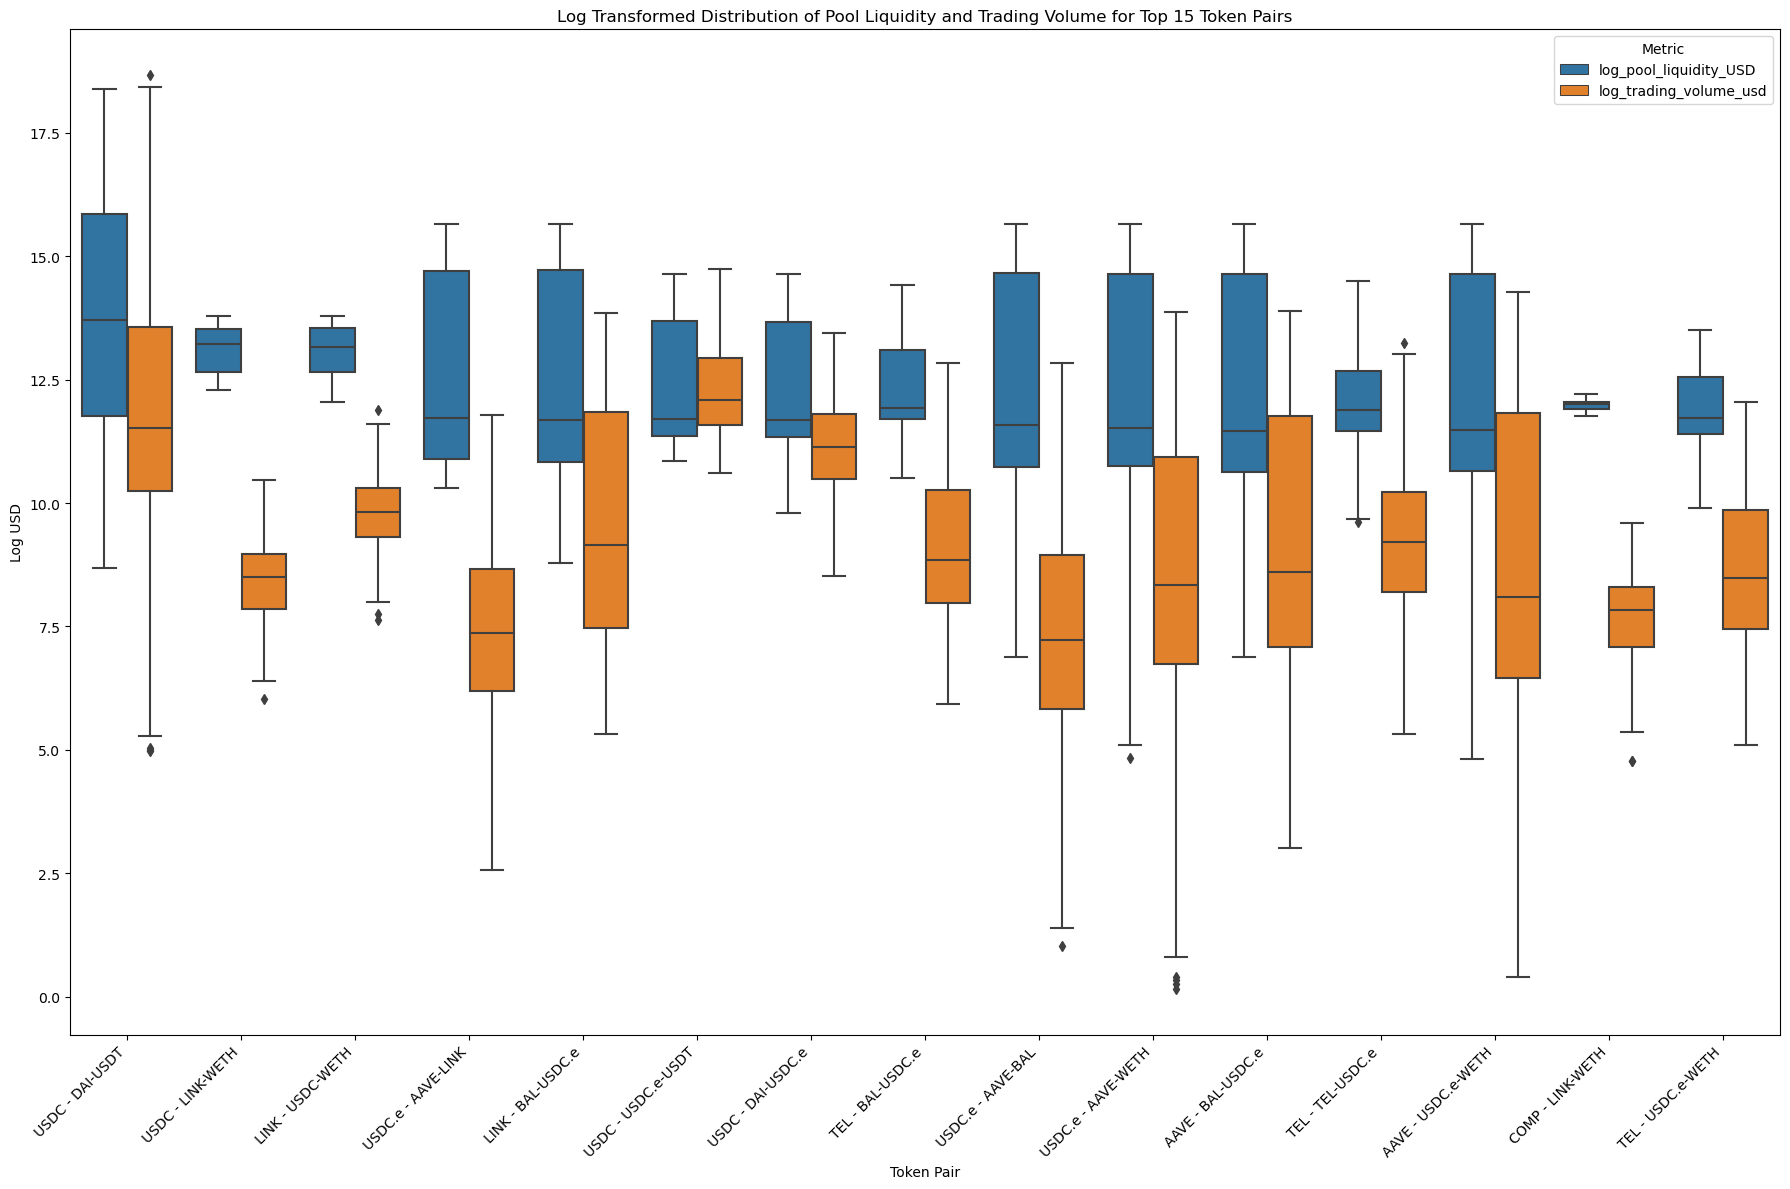

In [21]:
# Calculate average log liquidity for each group
avg_log_liquidity = filtered_df.groupby(['token_symbol', 'token_pair']).agg({
    'log_pool_liquidity_USD': 'mean'
}).reset_index()

# Sort by average log liquidity and select the top 15 groups
top_log_liquidity_groups = avg_log_liquidity.nlargest(15, 'log_pool_liquidity_USD')[['token_symbol', 'token_pair']]

# Create 'Token Pair' in top_log_liquidity_groups for labeling purposes
top_log_liquidity_groups['Token Pair'] = top_log_liquidity_groups['token_symbol'] + ' - ' + top_log_liquidity_groups['token_pair']

# Merge top groups back with filtered_df to get all days data for these groups
top_log_group_data = pd.merge(top_log_liquidity_groups, filtered_df, on=['token_symbol', 'token_pair'])

# Add 'Token Pair' column to top_log_group_data for boxplot
top_log_group_data['Token Pair'] = top_log_group_data['token_symbol'] + ' - ' + top_log_group_data['token_pair']

# Prepare the data for the seaborn boxplot
boxplot_data = pd.melt(top_log_group_data, 
                       id_vars=['Token Pair', 'day'], 
                       value_vars=['log_pool_liquidity_USD', 'log_trading_volume_usd'],
                       var_name='Metric', value_name='Value')

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18, 12))

# Create a box plot
sns.boxplot(x='Token Pair', y='Value', hue='Metric', data=boxplot_data, ax=ax)

# Set the x-tick labels with proper alignment and rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set the title and labels
ax.set_title('Log Transformed Distribution of Pool Liquidity and Trading Volume for Top 15 Token Pairs')
ax.set_ylabel('Log USD')
ax.set_xlabel('Token Pair')

# Adjust layout
plt.tight_layout()
plt.show()

### Top 15 Token's Pool Liquidity and Trading Volume in Log Transformed USD selected based on Average Log Trading Volume

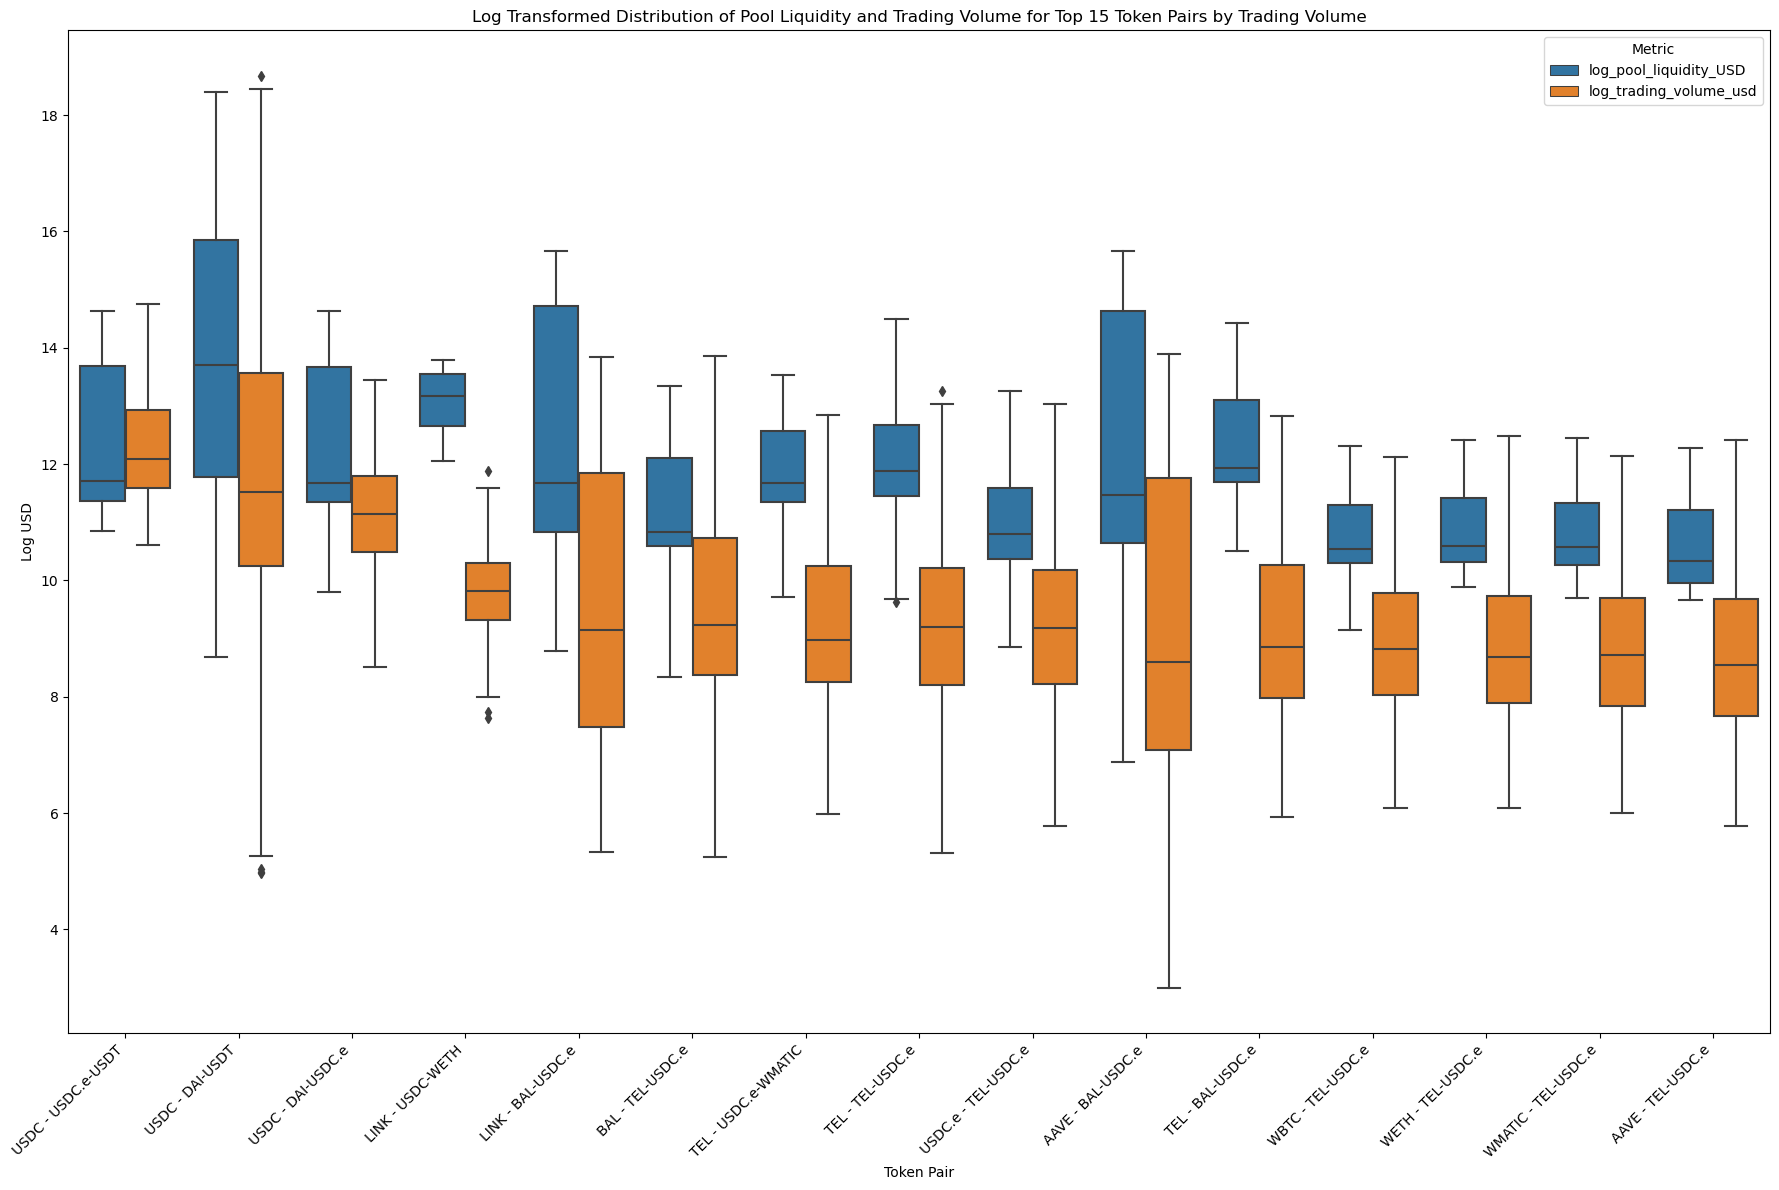

In [22]:
avg_log_trading_volume = filtered_df.groupby(['token_symbol', 'token_pair']).agg({
    'log_trading_volume_usd': 'mean'
}).reset_index()

# Sort by average log trading volume and select the top 15 groups
top_log_trading_volume_groups = avg_log_trading_volume.nlargest(15, 'log_trading_volume_usd')[['token_symbol', 'token_pair']]

# Create 'Token Pair' in top_log_trading_volume_groups for labeling purposes
top_log_trading_volume_groups['Token Pair'] = top_log_trading_volume_groups['token_symbol'] + ' - ' + top_log_trading_volume_groups['token_pair']

# Merge top groups back with filtered_df to get all days data for these groups
top_log_group_data_trading_volume = pd.merge(top_log_trading_volume_groups, filtered_df, on=['token_symbol', 'token_pair'])

# Prepare the data for the seaborn boxplot
boxplot_data_trading_volume = pd.melt(top_log_group_data_trading_volume, 
                                      id_vars=['Token Pair', 'day'], 
                                      value_vars=['log_pool_liquidity_USD', 'log_trading_volume_usd'],
                                      var_name='Metric', value_name='Value')

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18, 12))

# Create a box plot
sns.boxplot(x='Token Pair', y='Value', hue='Metric', data=boxplot_data_trading_volume, ax=ax)

# Set the x-tick labels with proper alignment and rotation
ax.set_xticklabels(top_log_trading_volume_groups['Token Pair'], rotation=45, ha='right')

# Set the title and labels
ax.set_title('Log Transformed Distribution of Pool Liquidity and Trading Volume for Top 15 Token Pairs by Trading Volume')
ax.set_ylabel('Log USD')
ax.set_xlabel('Token Pair')

# Adjust layout
plt.tight_layout()
plt.show()

## Insights from Log Transformed Distributions

Through log transformation, we have normalized the distribution of pool liquidity and trading volume data, crucial for:

- **Enhanced Model Performance:** Log normalization is particularly beneficial for linear models and helps deep learning models by stabilizing variance, which could improve learning efficiency.
- **Outlier Minimization:** The transformation reduces the impact of outliers, providing a more robust feature space for our models.
- **Data Splitting and Feature Engineering:** Understanding distribution characteristics aids in crafting stratified data splits and engineering features that capture essential trends and patterns.

### What We Can Infer

- **Variability Reduction:** The log transformation helps in reducing variability among token pairs, simplifying patterns for models to learn.
- **Trend Identification:** The box plots underscore the differences between token pairs, indicating liquidity and volume trends, which are vital for feature engineering.
- **Anomaly Detection:** Outliers that persist post-transformation can highlight anomalies for further investigation or special handling during modeling.

These steps are foundational for building a pipeline that ensures the efficiency of subsequent stages in data analysis and predictive modeling.


## Splitting the Dataset

In [23]:
@task(name=f"Split Dataset")
def split_data_by_token(df, test_size=0.2):
    """
    Splits the data into training and test sets, partitioned by token_symbol and token_pair
    and ordered by day.
    
    Parameters:
    - df: DataFrame containing the liquidity and trading volume data.
    - test_size: Proportion of the dataset to include in the test split.
    
    Returns:
    - train_df: DataFrame containing the training data.
    - test_df: DataFrame containing the test data.
    """
    train_frames = []
    test_frames = []
    
    # Group by both 'token_symbol' and 'token_pair'
    groups = df.groupby(['token_symbol', 'token_pair'])
    
    for _, group_data in groups:
        group_data_sorted = group_data.sort_values(by='day')
        split_idx = int(len(group_data_sorted) * (1 - test_size))
        train_frames.append(group_data_sorted.iloc[:split_idx])
        test_frames.append(group_data_sorted.iloc[split_idx:])
    
    train_df = pd.concat(train_frames).reset_index(drop=True)
    test_df = pd.concat(test_frames).reset_index(drop=True)
    
    return train_df, test_df


In [24]:
trainval_df, test_df = split_data_by_token.fn(filtered_df, test_size=0.2)

print("Train/Validation Set:")
print(trainval_df.head())
print(trainval_df.shape)
print("\nTest Set:")
print(test_df.head())
print(test_df.shape)

Train/Validation Set:
         day                                     pool_id blockchain  \
0 2021-05-24  0xde5030055361966f823c406ef292e5db70207696   ethereum   
1 2021-06-12  0x9e7fd25ad9d97f1e6716fa5bb04749a4621e892d   ethereum   
2 2021-06-14  0x9e7fd25ad9d97f1e6716fa5bb04749a4621e892d   ethereum   
3 2021-06-16  0x01abc00e86c7e258823b9a055fd62ca6cf61a163   ethereum   
4 2021-06-17  0x01abc00e86c7e258823b9a055fd62ca6cf61a163   ethereum   

                                         pool_symbol token_symbol  \
0                     usdc/comp/bal/aave 42/19/19/19         AAVE   
1  aave/bal/comp/matic/mkr/snx/weth/yfi 13/13/13/...         AAVE   
2  aave/bal/comp/matic/mkr/snx/weth/yfi 13/13/13/...         AAVE   
3  aave/bal/comp/mkr/sushi/uni/weth/yfi 13/13/13/...         AAVE   
4  aave/bal/comp/mkr/sushi/uni/weth/yfi 13/13/13/...         AAVE   

   pool_liquidity  pool_liquidity_USD token_pair  trading_volume_usd  \
0       10.110255         3635.072483   AAVE-BAL          204.21

In [25]:
final_train_df, val_df = split_data_by_token.fn(trainval_df, test_size=0.2)

print("Train Set:")
print(final_train_df.head())
print(final_train_df.shape)
print("\nValidation Set:")
print(val_df.head())
print(val_df.shape)

Train Set:
         day                                     pool_id blockchain  \
0 2021-05-24  0xde5030055361966f823c406ef292e5db70207696   ethereum   
1 2021-06-12  0x9e7fd25ad9d97f1e6716fa5bb04749a4621e892d   ethereum   
2 2021-06-14  0x9e7fd25ad9d97f1e6716fa5bb04749a4621e892d   ethereum   
3 2021-06-16  0x01abc00e86c7e258823b9a055fd62ca6cf61a163   ethereum   
4 2021-06-17  0x01abc00e86c7e258823b9a055fd62ca6cf61a163   ethereum   

                                         pool_symbol token_symbol  \
0                     usdc/comp/bal/aave 42/19/19/19         AAVE   
1  aave/bal/comp/matic/mkr/snx/weth/yfi 13/13/13/...         AAVE   
2  aave/bal/comp/matic/mkr/snx/weth/yfi 13/13/13/...         AAVE   
3  aave/bal/comp/mkr/sushi/uni/weth/yfi 13/13/13/...         AAVE   
4  aave/bal/comp/mkr/sushi/uni/weth/yfi 13/13/13/...         AAVE   

   pool_liquidity  pool_liquidity_USD token_pair  trading_volume_usd  \
0       10.110255         3635.072483   AAVE-BAL          204.219199   
1  

## Feature Engineering (Preliminary)

### Lag Features
- Creating **lagged versions of numerical variables** incorporates historical data into our models, allowing them to capture market momentum and trend directions.

In [26]:
@task(name="Feature Engineering Lags")
def feature_engineering_lags(df):
    processed_groups = []  # To store processed DataFrames for each group

    # Iterate over each combination of token_symbol and token_pair
    for _, group_data in df.groupby(['token_symbol', 'token_pair']):

        # Ensure 'day' column is in datetime format for time feature extraction
        group_data['day'] = pd.to_datetime(group_data['day'])
        
        # Time Features
        group_data['day_of_week'] = group_data['day'].dt.dayofweek
        group_data['week_of_year'] = group_data['day'].dt.isocalendar().week
        group_data['month'] = group_data['day'].dt.month
        
        # List of original and logged features for which to create lags
        features = ['pool_liquidity_USD', 'trading_volume_usd']
        logged_features = [f'log_{feature}' for feature in features]
        all_features = features + logged_features

        for feature in all_features:
            # Lag Features - here we are creating just one lag (previous day's data)
            # You can create more lags by adding more shift values if needed
            group_data[f'{feature}_lag1'] = group_data[feature].shift(1)

        # Append the processed group data to the list
        processed_groups.append(group_data)

    # Concatenate all processed groups back into a single DataFrame
    final_df = pd.concat(processed_groups, ignore_index=True)
    
    return final_df

In [27]:
# Feature engineering in final_train_df
train_df_engineered = feature_engineering_lags.fn(final_train_df)
train_df_engineered.columns

Index(['day', 'pool_id', 'blockchain', 'pool_symbol', 'token_symbol',
       'pool_liquidity', 'pool_liquidity_USD', 'token_pair',
       'trading_volume_usd', 'log_pool_liquidity_USD',
       'log_trading_volume_usd', 'day_of_week', 'week_of_year', 'month',
       'pool_liquidity_USD_lag1', 'trading_volume_usd_lag1',
       'log_pool_liquidity_USD_lag1', 'log_trading_volume_usd_lag1'],
      dtype='object')

In [28]:
# Nan Report
generate_nan_report.fn(train_df_engineered)
train_df_engineered.shape

                             Missing Values  Percentage (%)
day                                       0        0.000000
pool_id                                   0        0.000000
blockchain                                0        0.000000
pool_symbol                               0        0.000000
token_symbol                              0        0.000000
pool_liquidity                            0        0.000000
pool_liquidity_USD                        0        0.000000
token_pair                                0        0.000000
trading_volume_usd                        0        0.000000
log_pool_liquidity_USD                    0        0.000000
log_trading_volume_usd                    0        0.000000
day_of_week                               0        0.000000
week_of_year                              0        0.000000
month                                     0        0.000000
pool_liquidity_USD_lag1                 401        0.133377
trading_volume_usd_lag1                 

(300652, 18)

## Data Imputation

To fix the existing NaN values on the feature engineered columns, We will apply different imputation techniques/strategy to the each of the columns based on best sound reasoning.

1. **Volatility Measures and 7-Day Averages**:  
For volatility measures and 7-day averages, being dependent upon a rolling window, NaN values are often located at the very beginning of the data set, where there are not enough data with which to perform the calculation of these metrics. A viable approach here is to forward fill these NaNs, as it implies that the first calculated value may represent a good proxy for missing earlier values. This method preserves the temporal integrity of the data.

2. **Lag Features**:  
NaN values in lag features occur when there are no preceding values for the initial entries. Forward filling is also a plausible strategy here as it presupposes that the first value of each series is being retained from the start. Otherwise, setting the initial NaNs in lag features to 0 might be reasonable, assuming no change from a non-existent prior period.

3. **Growth Features and Change Ratio**:  
Growth features and change ratios stand to mention relative changes and can have NaN values whenever the information of the prior period is lacking or it has not yet been acquired. Given that a 0% change ratio implies no change, it is set up to set NaNs in these features at zero, which means that no growth or change from a non-existent or missing previous period is observed.

4. **Moving Average Convergence Divergence (MACD)**:  
The MACD is derived from exponential moving averages and was so designed as to indicate changes in the strength, direction, momentum, and duration of a trend. Using forward fill for the imputation of NaN values in MACD and its signal line is a suitable way to go, given that it assumes the trend from the first calculated value continues backwards to the start of the data set. This ensures that sudden shifts in trend indicators do not take place at the very beginning.


In [29]:
@task(name=f"Data Imputation")
def apply_imputations(group, feature_groups):
    """
    Applies imputation strategies to a given group (DataFrame) based on predefined feature groups.

    Parameters:
    - group: DataFrame group, part of a larger DataFrame split by some key (e.g., 'symbol').
    - feature_groups: Dictionary containing feature group names as keys and lists of column names as values.

    Returns:
    - DataFrame with imputations applied.
    """
    # Check if the group has less than 2 data points which affects lag and other calculations
    if len(group) < 2:
        # For groups with 1 or 0 data points, directly fill all specified features with 0
        for feature_list in feature_groups.values():
            group[feature_list] = 0
    else:
        # Apply specific imputation strategies based on feature group
        for feature_group, features in feature_groups.items():
            if feature_group == 'growth_features' or feature_group == 'change_ratio_features':
                # Set to 0 for growth features and change ratios
                group[features] = group[features].fillna(0)
            elif feature_group == 'lag_features' or feature_group == 'ema_macd_columns':
                # Forward Fill, then fill remaining NaNs (if any) with 0 for lag and EMA/MACD features
                group[features] = group[features].ffill().fillna(0)
            elif feature_group == 'avg_7d_features' or feature_group == 'volatility_features':
                # Use backward fill for initial NaNs, then forward fill for 7-day averages and volatility measures
                group[features] = group[features].bfill().ffill().fillna(0)

    return group

In [30]:
# Since We don't have other financial metric on the dataset we will focus more on the lagged features of the orginal variables that we are trying to predict
# We still setup the function "apply_imputations" to be flexible for future use.

feature_groups = {
    'lag_features': [
        'pool_liquidity_USD_lag1',
        'trading_volume_usd_lag1',
        'log_pool_liquidity_USD_lag1',
        'log_trading_volume_usd_lag1'
    ]
}

In [31]:
train_df_engineered_clean = train_df_engineered.groupby(['token_symbol', 'token_pair']).apply(lambda group: apply_imputations.fn(group, feature_groups)).reset_index(drop=True)

In [32]:
generate_nan_report.fn(train_df_engineered_clean)

                             Missing Values  Percentage (%)
day                                       0             0.0
pool_id                                   0             0.0
blockchain                                0             0.0
pool_symbol                               0             0.0
token_symbol                              0             0.0
pool_liquidity                            0             0.0
pool_liquidity_USD                        0             0.0
token_pair                                0             0.0
trading_volume_usd                        0             0.0
log_pool_liquidity_USD                    0             0.0
log_trading_volume_usd                    0             0.0
day_of_week                               0             0.0
week_of_year                              0             0.0
month                                     0             0.0
pool_liquidity_USD_lag1                   0             0.0
trading_volume_usd_lag1                 

Now that the dataset is now cleaned. We will create a correlational heatmap to see if there are variables/columns that are highly correlated to avoid multi-collinearity.

## Correlational Analysis

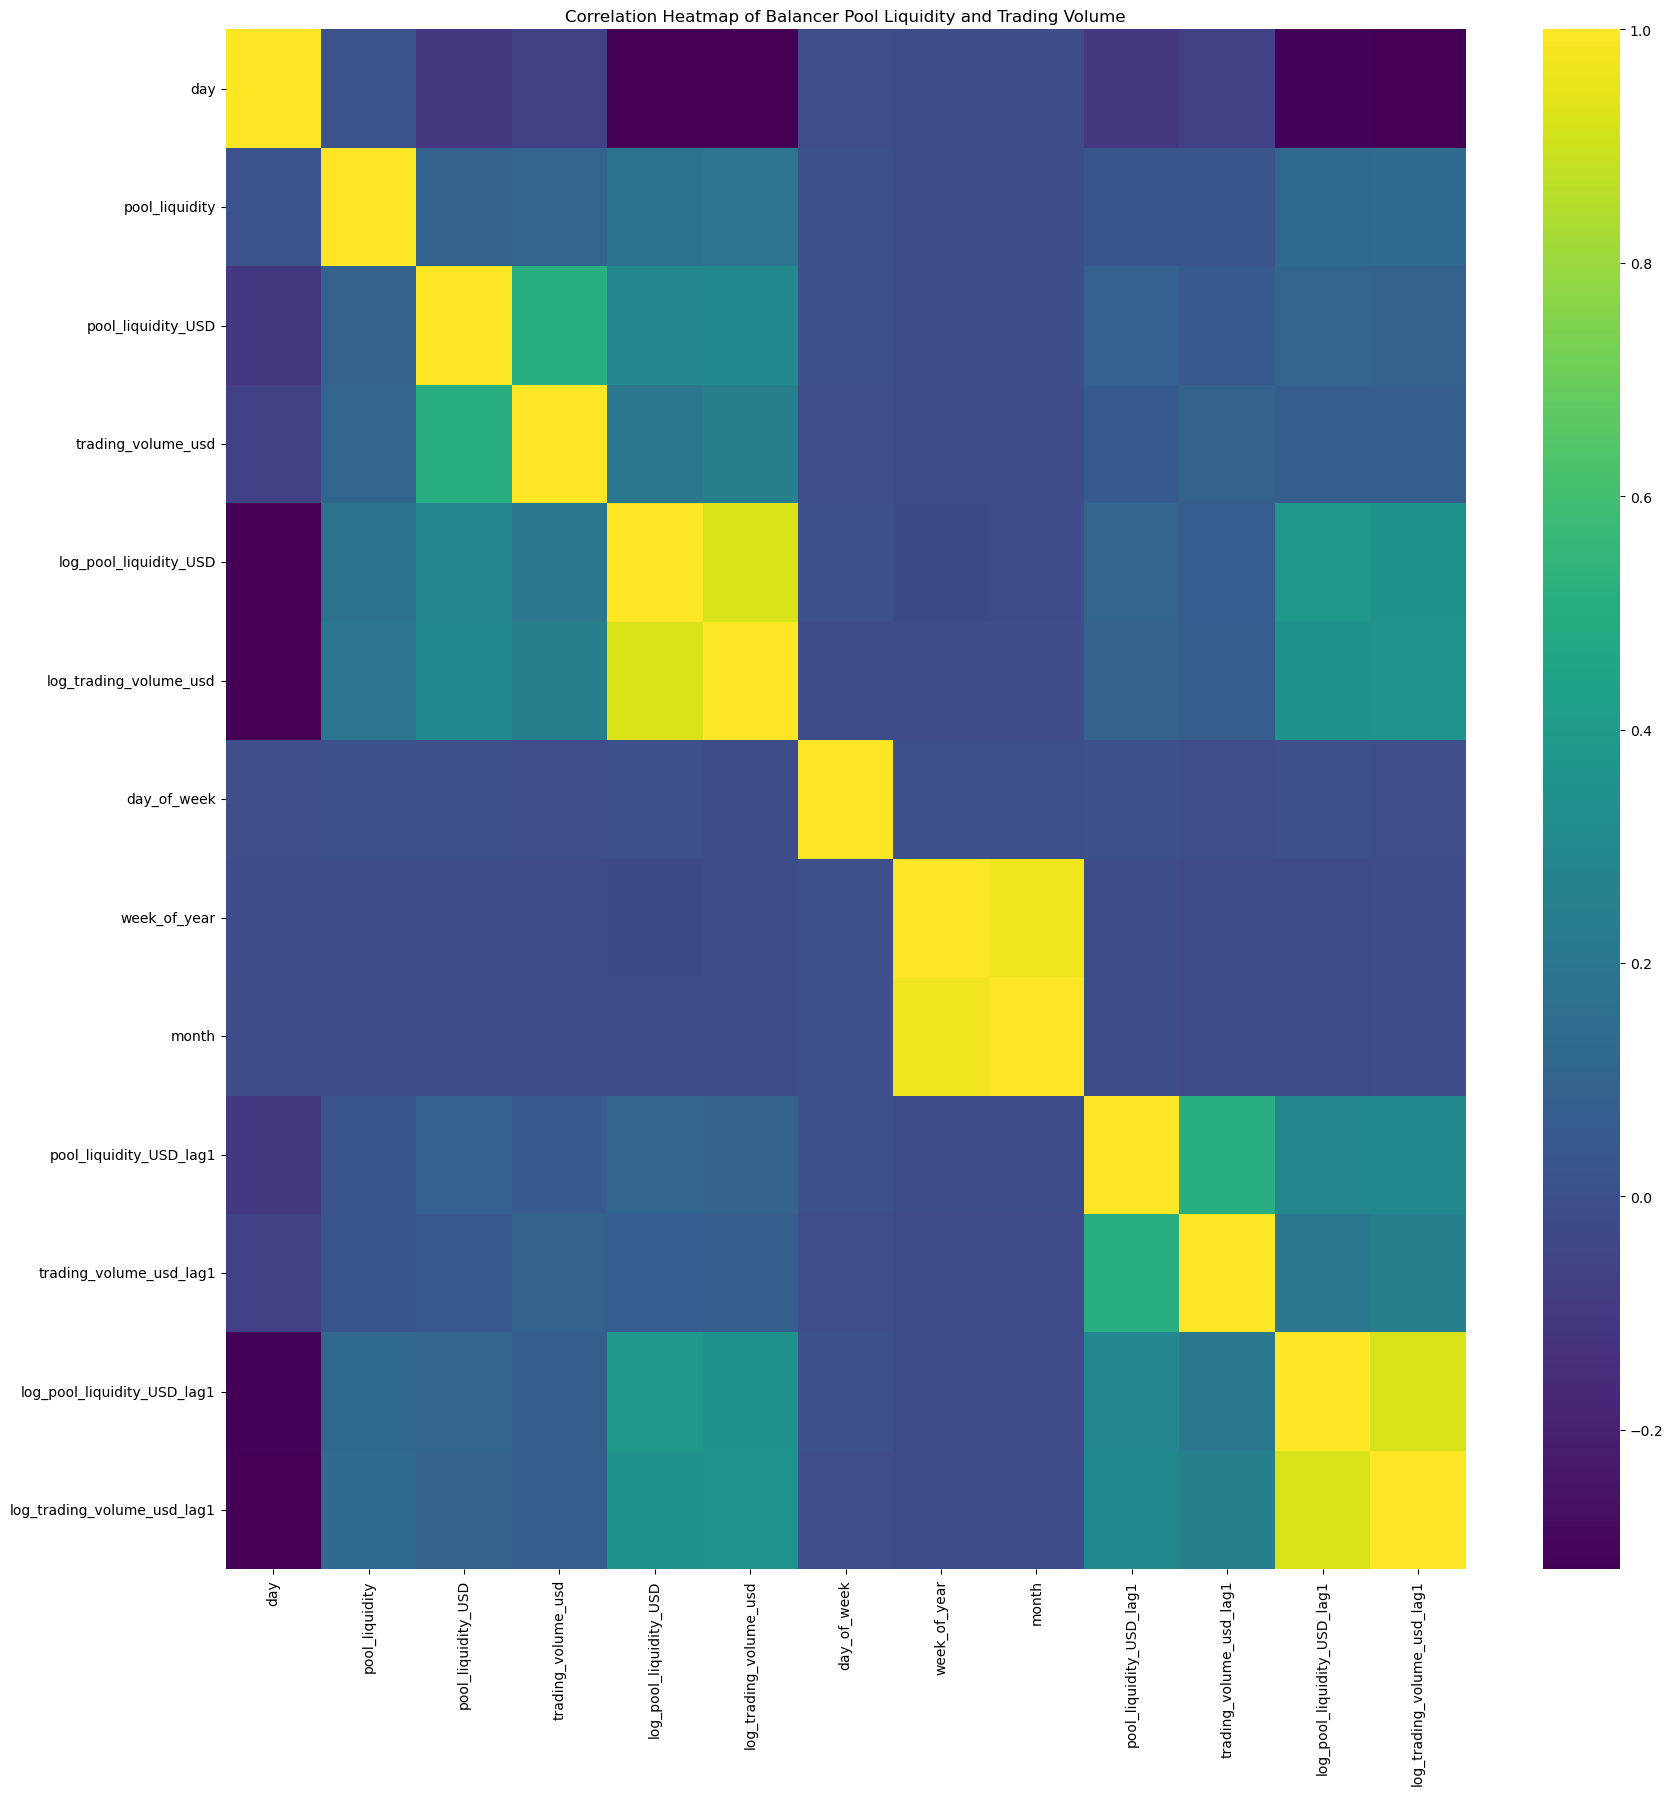

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numerical columns
train_df_engineered_clean_numerical = train_df_engineered_clean.drop(columns=['token_pair', 'token_symbol', 'blockchain', 'pool_id', 'pool_symbol'])

# Calculate correlation matrix
correlation_matrix = train_df_engineered_clean_numerical.corr()

# Generate a heatmap
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="viridis")
plt.xticks(rotation=90)  # Rotate column names for better readability
plt.yticks(rotation=0)
plt.title('Correlation Heatmap of Balancer Pool Liquidity and Trading Volume')
plt.show()

## Predicting Pool Liquidity and Trading Volume

In [34]:
@task(name="Feature Engineer Additional Transformations")
def feature_engineering_transformations(df, lagged_features):
    """
    Applies additional transformations such as standard deviation, 
    rolling average, and MACD to the lagged features.
    
    Parameters:
    - df: DataFrame containing the data with lagged features.
    - lagged_features: List of lagged feature column names to transform.
    
    Returns:
    - df: DataFrame with additional transformations applied to lagged features.
    """
    for feature in lagged_features:
        # Group by 'token_symbol' and 'token_pair' before applying transformations
        group = df.groupby(['token_symbol', 'token_pair'])
        
        # Calculate the 7-day standard deviation of the lagged feature
        df[f'{feature}_std_7d'] = group[feature].transform(lambda x: x.rolling(window=7).std())
        
        # Calculate the 7-day rolling average of the lagged feature
        df[f'{feature}_rolling_avg_7d'] = group[feature].transform(lambda x: x.rolling(window=7).mean())
        
        # Calculate Exponential Moving Averages (EMA) and MACD on the lagged rate
        df[f'{feature}_12d_EMA'] = group[f'{feature}'].transform(lambda x: x.ewm(span=12, adjust=False).mean())
        df[f'{feature}_26d_EMA'] = group[f'{feature}'].transform(lambda x: x.ewm(span=26, adjust=False).mean())
        df[f'{feature}_MACD'] = df[f'{feature}_12d_EMA'] - df[f'{feature}_26d_EMA']
        df[f'{feature}_MACD_signal'] = df[f'{feature}_MACD'].transform(lambda x: x.ewm(span=9, adjust=False).mean())
    
    # Handle NaNs that were introduced by the transformations
    df.bfill()
    df.ffill()
    
    return df

In [35]:
# Specify the lagged features for which you want to apply the additional transformations
lagged_features_to_transform = ['pool_liquidity_USD_lag1', 'trading_volume_usd_lag1', 
                                'log_pool_liquidity_USD_lag1', 'log_trading_volume_usd_lag1']


# Apply the function
train_df_transformed  = feature_engineering_transformations.fn(train_df_engineered_clean, lagged_features_to_transform)

C:\Users\Predator\AppData\Local\Temp\ipykernel_25364\51397275.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
C:\Users\Predator\AppData\Local\Temp\ipykernel_25364\51397275.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [36]:
nan_counts = train_df_transformed.isna().sum().sum()

print(f"Total Nan Count: {nan_counts}")

Total Nan Count: 0


In [37]:
train_df_transformed.drop(['log_pool_liquidity_USD', 'blockchain', 'pool_id', 'pool_symbol'], axis=1, inplace=True)

We dropped the variable above to avoid data leakage and was only used for preprocessing purposes but we will still be leveraging the data that we gathered fromm by using its lagged feature. Thus, we are still able to levarage the data from that variable on model training.

## One Hot Encoding

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define the columns for one-hot encoding and standard scaling
categorical_columns = ['token_pair', 'token_symbol', 'day_of_week', 'week_of_year', 'month']
excluded_columns = categorical_columns + ['day']
numerical_columns = [col for col in train_df_transformed.columns if col not in excluded_columns]

# Create the column transformer
column_transformer = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(), categorical_columns),
    ('scaler', StandardScaler(), numerical_columns)
])

# Specify the target variables
target_variables = ['pool_liquidity_USD']

# Get a list of all columns in the DataFrame, excluding the target variable
columns = list(train_df_transformed.columns)
columns.remove('pool_liquidity_USD')

# Append the target variables to the end of the list
columns.extend(target_variables)

# Rearrange the DataFrame using the new column order
train_df_transformed = train_df_transformed[columns]

In [39]:
#Sanity check
train_df_transformed.head()

,day,token_symbol,pool_liquidity,token_pair,trading_volume_usd,day_of_week,week_of_year,month,pool_liquidity_USD_lag1,trading_volume_usd_lag1,...,log_pool_liquidity_USD_lag1_26d_EMA,log_pool_liquidity_USD_lag1_MACD,log_pool_liquidity_USD_lag1_MACD_signal,log_trading_volume_usd_lag1_std_7d,log_trading_volume_usd_lag1_rolling_avg_7d,log_trading_volume_usd_lag1_12d_EMA,log_trading_volume_usd_lag1_26d_EMA,log_trading_volume_usd_lag1_MACD,log_trading_volume_usd_lag1_MACD_signal,pool_liquidity_USD
0,2021-05-24,AAVE,10.110255,AAVE-BAL,204.219199,0,21,5,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.204625,4.738129,0.000000,0.000000,0.000000,0.000000,3635.072483
1,2021-06-12,AAVE,42.467768,AAVE-BAL,122.180137,5,23,6,3635.072483,204.219199,...,0.607308,0.654024,0.130805,2.204625,4.738129,0.819089,0.394376,0.424713,0.084943,12234.625468
2,2021-06-14,AAVE,41.547294,AAVE-BAL,498.075158,0,24,6,12234.625468,122.180137,...,1.259515,1.255782,0.355800,2.204625,4.738129,1.433637,0.721730,0.711907,0.210335,13149.832944
3,2021-06-16,AAVE,42.473539,AAVE-BAL,206.217476,2,24,6,13149.832944,498.075158,...,1.868754,1.718688,0.628378,2.204625,4.738129,2.168886,1.128472,1.040413,0.376351,12745.959096
4,2021-06-17,AAVE,41.923018,AAVE-BAL,118.949146,3,24,6,12745.959096,206.217476,...,2.430554,2.059290,0.914560,2.204625,4.738129,2.655791,1.439976,1.215815,0.544244,12273.468011


In [40]:
import numpy as np
import pandas as pd

# Initialize a mask to store infinity checks for numeric columns only
inf_mask = pd.DataFrame()

for column in train_df_transformed.select_dtypes(include=[np.number]).columns:
    inf_mask[column] = np.isinf(train_df_transformed[column])

# Check columns that contain infinity values
columns_with_inf = inf_mask.any()
print("Columns with infinity values:")
print(columns_with_inf[columns_with_inf].index.tolist())

# Find rows where any column has infinity
rows_with_inf_mask = inf_mask.any(axis=1)
if rows_with_inf_mask.any():
    print("\nRows with infinity values shape:")
    print(train_df_transformed[rows_with_inf_mask].shape)

Columns with infinity values:
[]


In [41]:
#Dropping rows/entries with infinite values.
train_df_transformed.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df_transformed.dropna(inplace=True)

In [42]:
@task(name=f"One Hot Encoding")
def one_hot_encoding(df, column_transformer, fit_transform = True):
    if fit_transform:
        df_transformed = column_transformer.fit_transform(df)
    else:
        df_transformed = column_transformer.transform(df)
    return (df_transformed, column_transformer)

In [43]:
# Perform fit_transform on the DataFrame without 'supplyRate'
(train_df_transformed_v2, column_transformer) = one_hot_encoding.fn(train_df_transformed, column_transformer, True)
print(train_df_transformed.shape)
print(train_df_transformed_v2.shape)

(300652, 37)
(300652, 153)


## Model Training

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import scipy
from torch.utils.data import DataLoader, TensorDataset, random_split

# If train_df_transformed_v2 is a csr_matrix, convert it to a dense NumPy array
if isinstance(train_df_transformed_v2, scipy.sparse.csr_matrix):
    X_dense = train_df_transformed_v2.toarray()  # Convert the entire matrix to a dense array

# Convert the data to a dense NumPy array before slicing
X_dense = X_dense[:, :-1]  # Features: all columns except the last one
y_dense = X_dense[:, -1]   # Target: the last column

print(f"X training variables shape: {X_dense.shape}")
print(f"y training variable shape: {y_dense.shape}")

X_tensor = torch.tensor(X_dense, dtype=torch.float32)
y_tensor = torch.tensor(y_dense, dtype=torch.float32).view(-1, 1)

dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(dataset=dataset, batch_size=128, shuffle=True)

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


X training variables shape: (300652, 152)
y training variable shape: (300652,)


In [45]:
class DeepNNModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(DeepNNModel, self).__init__()
        self.layers = nn.ModuleList()

        # First Linear layer
        self.layers.append(nn.Linear(input_size, hidden_layers[0]))
        # Alternating ReLU and Linear layers
        for i in range(1, len(hidden_layers)):
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Linear(hidden_layers[i-1], hidden_layers[i]))
        # Final ReLU before the output layer
        self.layers.append(nn.ReLU())
        # Output layer
        self.layers.append(nn.Linear(hidden_layers[-1], output_size))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [46]:
@task(name=f"Train Model")
def train_model(model, criterion, optimizer, train_loader, num_epochs=200, scheduler=None):
    """
    Trains a PyTorch model.

    Parameters:
    - model: The PyTorch model to be trained.
    - criterion: Loss function.
    - optimizer: Optimizer.
    - train_loader: DataLoader containing the training dataset.
    - num_epochs: Number of epochs to train for.
    - scheduler: (Optional) Learning rate scheduler.

    Returns:
    - model: The trained model.
    """
    # Check if CUDA is available and set the device accordingly
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Training on device: {device}")

    # Move the model to the chosen device
    model.to(device)

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        # Step the scheduler
        if scheduler:
            scheduler.step()

        epoch_loss = running_loss / len(train_loader.dataset)

        if epoch % 10 == 0:  # Print loss every 10 epochs
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.8f}')
    
    return model

In [47]:
# Model configuration
num_features = X_tensor.shape[1]
hidden_layers = [32, 64, 32, 16]  #Deep Architecture
output_size = 1  #output/result

model = DeepNNModel(input_size=num_features, hidden_layers=hidden_layers, output_size=output_size)

# Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the chosen device
model = model.to(device)

# Loss function
loss_function = nn.MSELoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Number of epochs
epochs = 100  # Increase or decrease based on the convergence of the model

# Call the train_model function with the specified parameters
model = train_model.fn(
    model=model,
    criterion=loss_function,
    optimizer=optimizer,
    train_loader=train_loader,
    num_epochs=epochs,
    scheduler=scheduler
)

Training on device: cpu
Epoch 1/40, Loss: 0.02291074
Epoch 11/40, Loss: 0.00002685
Epoch 21/40, Loss: 0.00000127
Epoch 31/40, Loss: 0.00000071


In [48]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

@task(name=f"Model Evaluation")
def evaluate_model(model, X_tensor, y_tensor, dataset_type='Training'):
    """
    Evaluates the given model using RMSE and R2-score for each target variable.

    Parameters:
    - model: The trained PyTorch model.
    - X_tensor: Features tensor.
    - y_tensor: Target tensor.
    - dataset_type: A string indicating the dataset type (e.g., 'Training', 'Validation', 'Test').

    Returns:
    - None
    """
    eval_dataset = TensorDataset(X_tensor, y_tensor)
    eval_loader = DataLoader(dataset=eval_dataset, batch_size=64, shuffle=False)

    model.eval()  # Set the model to evaluation mode
    device = next(model.parameters()).device  # Get the device model is on

    predictions = []
    true_values = []

    with torch.no_grad():  # No need to track gradients during evaluation
        for inputs, labels in eval_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move to same device as model
            outputs = model(inputs)

            # Store predictions and true values
            predictions.extend(outputs.cpu().numpy())
            true_values.extend(labels.cpu().numpy())

    # Convert lists to NumPy arrays
    predictions = np.array(predictions)
    true_values = np.array(true_values)

    # Calculate evaluation metrics for each target variable
    for i in range(predictions.shape[1]):  # Loop over each target (column)
        mse = mean_squared_error(true_values[:, i], predictions[:, i])
        rmse = np.sqrt(mse)
        r2 = r2_score(true_values[:, i], predictions[:, i])

        # Print results for each target
        print(f"{dataset_type} Target {i+1} RMSE: {rmse}")
        print(f"{dataset_type} Target {i+1} R-squared (R²) score: {r2}")


In [49]:
from scipy.sparse import csr_matrix

if isinstance(train_df_transformed_v2, csr_matrix):
    train_df_transformed_v2 = train_df_transformed_v2.toarray()

# Assuming train_df_transformed_v2 is a NumPy array now, slice the features and target
X_tensor = torch.tensor(train_df_transformed_v2[:, :-1], dtype=torch.float32)  # Exclude the last column (target variable)
y_tensor = torch.tensor(train_df_transformed_v2[:, -1], dtype=torch.float32)   # Last column as target

# Ensure y_tensor is correctly shaped as a 2D column vector
y_tensor = y_tensor.unsqueeze(1)

# Call the evaluation function
evaluate_model.fn(model, X_tensor, y_tensor, dataset_type='Training')

Training Target 1 RMSE: 0.6355553269386292
Training Target 1 R-squared (R²) score: 0.596069439000692


In [58]:
@task(name="Evaluate Dataset")
def evaluate_dataset(df, column_transformer, model, feature_groups, dataset_type='validation', batch_size=64):
    """
    Evaluates the dataset by applying feature engineering, cleaning, transforming,
    and calculating evaluation metrics for the last column as the target feature.
    """
    # Check if input is a csr_matrix and convert to dense DataFrame if necessary
    if isinstance(df, scipy.sparse.csr_matrix):
        df = df.toarray()
        print("Converted csr_matrix to dense array.")

    # Ensure we are handling numpy array correctly
    print(f"Data shape before slicing: {df.shape}")

    # Feature engineering
    df_engineered = feature_engineering_lags.fn(df)

    # Clean the dataset
    df_engineered_clean = df_engineered.groupby(['token_symbol', 'token_pair']).apply(lambda group: apply_imputations.fn(group, feature_groups)).reset_index(drop=True)

    # Check for NaN values
    nan_counts = df_engineered_clean.isna().sum().sum()
    print(f"Total Nan Count after cleaning: {nan_counts}")

    lagged_features_to_transform = ['pool_liquidity_USD_lag1', 'trading_volume_usd_lag1', 
                                'log_pool_liquidity_USD_lag1', 'log_trading_volume_usd_lag1']

    # Apply feature engineering with the pool liquidity variable
    df_engineered = feature_engineering_transformations.fn(df_engineered_clean, lagged_features_to_transform)

    #Dropping rows/entries with infinite values.
    df_engineered.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_engineered.dropna(inplace=True)

    # Transform the dataset
    transformed, _ = one_hot_encoding.fn(df_engineered, column_transformer, fit_transform=False)
    
    # Convert to dense format if necessary
    if isinstance(transformed, np.ndarray):
        X_dense = transformed[:, :-1]
        y_dense = transformed[:, -1]
    else:  # Assuming csr_matrix or similar
        X_dense = transformed[:, :-1].toarray()
        y_dense = transformed[:, -1].toarray()

    # Prepare tensors
    X_tensor = torch.tensor(X_dense, dtype=torch.float32)
    y_tensor = torch.tensor(y_dense, dtype=torch.float32).view(-1,1)

    eval_dataset = TensorDataset(X_tensor, y_tensor)
    eval_loader = DataLoader(dataset=eval_dataset, batch_size=batch_size, shuffle=False)

    model.eval()  # Set the model to evaluation mode

    predictions = []
    true_values = []

    with torch.no_grad():  # No need to track gradients during evaluation
        for inputs, labels in eval_loader:
            device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            inputs = inputs.to(device)
            outputs = model(inputs)
            predictions.extend(outputs.cpu().numpy())
            true_values.extend(labels.cpu().numpy())

    # Calculate evaluation metrics
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(true_values, predictions)
    
    # Print results
    # Print results
    print(f"{dataset_type} RMSE: {rmse}")
    print(f"{dataset_type} R-squared (R²) score: {r2}")

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\tasks.py:337: UserWarning: A task named 'Evaluate Dataset' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\task.py:1' conflicts with another task. Consider specifying a unique `name` parameter in the task definition:

 `@task(name='my_unique_name', ...)`
  warnings.warn(


In [59]:
# For validation dataset
evaluate_dataset.fn(val_df, column_transformer, model, feature_groups, dataset_type='validation')

# For test dataset
evaluate_dataset.fn(test_df, column_transformer, model, feature_groups, dataset_type='test')

Data shape before slicing: (75380, 11)
Total Nan Count after cleaning: 0


C:\Users\Predator\AppData\Local\Temp\ipykernel_25364\51397275.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
C:\Users\Predator\AppData\Local\Temp\ipykernel_25364\51397275.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


validation RMSE: 0.5918578505516052
validation R-squared (R²) score: 0.6573860581005618
Data shape before slicing: (94222, 11)
Total Nan Count after cleaning: 0


C:\Users\Predator\AppData\Local\Temp\ipykernel_25364\51397275.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
C:\Users\Predator\AppData\Local\Temp\ipykernel_25364\51397275.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


test RMSE: 0.5533528923988342
test R-squared (R²) score: 0.6324117063626802


Soon as Orion supports neural network operators for GRU and LSTMs. We can further improve the metrics and score of our model.

## Transitioning the Model to ZKML using GizaTech's AI Actions and Orion Framework